# AI_Masters_ Capstone_Project
## Finance: Fraud Detection Problem

**Problem Statement**

Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate. 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase.
You are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.

**Project Task: Week 1**

Exploratory Data Analysis (EDA):

1.    Perform an EDA on the Dataset.
       a)    Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean)with unit standard deviation
       b)    Find if there is any connection between Time, Amount, and the transaction being fraudulent.
2.    Check the class count for each class. It’s a class Imbalance problem.

3.    Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.
       a.    Oversampling or undersampling can be used to tackle the class imbalance problem
       b.    Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.
       
4.     Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1 Score as the evaluation criteria for this project.

In [5]:
#importing the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import figure
import matplotlib.gridspec as gridspec
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5

from sklearn import preprocessing

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# import data
train_df=pd.read_csv('/content/drive/My Drive/Capstone_Project/train_data.csv')
val_df=pd.read_csv('/content/drive/My Drive/Capstone_Project/test_data_hidden.csv')
test_df=pd.read_csv('/content/drive/My Drive/Capstone_Project/test_data.csv')

In [ ]:
'''# import data

train_df=pd.read_csv('Financial/train_data.csv')
val_df=pd.read_csv('Financial/test_data_hidden.csv')
test_df=pd.read_csv('Financial/test_data.csv')'''

In [4]:
train_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0
5,37590.0,-6.341667,1.192815,-3.686579,-2.754006,-5.007164,3.988118,1.693606,-13.577522,2.557965,-0.931438,-1.189333,0.762725,-0.517857,0.067279,-0.099498,0.837768,-0.156679,-0.402600,-0.238742,-7.171342,9.779321,-3.660198,-1.507217,-0.179185,0.002092,-0.019168,3.611243,-0.894494,1437.08,0
6,56739.0,-0.463928,0.204745,2.795734,1.546200,-0.720374,1.108212,-0.581133,0.544075,1.099843,-0.653523,-1.420838,0.427211,-0.436201,-1.055012,-1.225903,-1.179268,0.846734,-0.374502,0.623190,-0.052393,0.094431,0.788161,-0.100344,0.126248,-0.461584,-0.200985,0.280168,0.180046,11.10,0
7,912.0,-1.394619,0.554224,-0.617805,-0.313706,2.157413,3.537534,-0.567305,1.380888,-0.112291,0.107269,-0.637728,0.099510,-0.062533,0.254824,0.318805,-0.335245,0.052870,0.048783,1.654699,0.336595,-0.196300,-0.546172,-0.124758,1.046780,-0.089474,0.363674,0.215692,0.225698,24.08,0
8,171058.0,-2.121785,-1.518485,2.667942,-2.458839,-1.414952,0.807935,-1.870160,0.516477,-0.553359,0.645799,-0.514941,0.618199,1.461221,-2.116306,-3.244732,-0.345286,0.368870,0.699637,0.031145,-0.684797,-0.079591,0.659885,-1.000976,-0.212991,0.420722,-0.019645,-0.482792,-0.407780,28.00,0
9,79450.0,-2.254788,-0.955967,0.590596,0.114744,-5.876531,3.364858,6.365904,-1.252960,0.243849,-1.637022,-0.626434,0.105457,0.859541,-1.306715,-0.724693,0.553933,-0.590110,-0.471491,-0.291435,-0.772127,-0.601908,-0.092918,0.517855,0.534361,0.494493,0.301414,0.507071,-0.560888,1354.98,0


In [ ]:
val_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0
5,55069.0,0.441380,-2.217230,0.802581,-0.127056,-1.867945,0.495430,-0.741205,0.214230,-0.198782,...,0.346116,0.232975,-0.316073,0.288840,0.103051,-0.289289,-0.010973,0.085977,423.70,0
6,135629.0,1.937007,0.394490,-0.860965,3.720728,0.458475,0.159445,0.017991,0.024848,-0.615042,...,0.258103,0.737337,0.030587,0.633156,0.198230,0.219840,-0.049470,-0.048914,10.59,0
7,33643.0,-0.552654,-0.279974,2.626373,0.535665,-1.350645,0.523387,0.124452,0.076345,-0.800457,...,-0.094506,0.261415,0.152325,0.322421,-0.217550,-0.179712,-0.010302,-0.087118,137.00,0
8,80729.0,-2.760629,2.206112,-0.193100,0.764237,-0.718603,-0.920526,0.228957,0.507112,0.084184,...,0.037991,0.463003,0.083789,0.412720,0.093874,-0.336316,0.084779,0.490768,40.11,0
9,2473.0,-0.287085,0.061850,1.389693,-0.844605,-0.756236,-0.702512,0.256420,-0.056059,-1.814368,...,-0.187208,-0.212449,0.064802,0.547049,-0.537486,1.039433,0.044394,0.120748,51.70,0


In [ ]:
test_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,-1.949546,-0.494436,-0.353696,0.158729,-0.267239,0.234802,-0.754936,-0.343012,0.312175,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,-0.587786,0.317419,-0.408521,0.719639,0.226926,-0.296316,-0.040143,0.119177,1.057682,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,-1.753256,-1.331010,-0.061941,-0.405532,0.048083,-0.307503,0.289363,0.189739,0.022546,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,0.607629,1.048673,-0.514821,0.329538,-1.041463,-0.498797,-0.276887,0.114245,0.379447,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,0.173132,1.430172,0.915609,-0.336588,1.140171,-0.653626,-0.016567,0.066287,0.242537,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00
5,55069.0,0.441380,-2.217230,0.802581,-0.127056,-1.867945,0.495430,-0.741205,0.214230,-0.198782,0.311865,1.308096,0.644987,0.029716,-0.594013,-1.096101,0.635967,0.802594,-1.483659,0.636492,0.866981,0.346116,0.232975,-0.316073,0.288840,0.103051,-0.289289,-0.010973,0.085977,423.70
6,135629.0,1.937007,0.394490,-0.860965,3.720728,0.458475,0.159445,0.017991,0.024848,-0.615042,1.511407,-1.706707,-1.172083,-1.492230,0.453003,-0.626810,0.841378,-0.729508,0.060131,-1.575751,-0.350720,0.258103,0.737337,0.030587,0.633156,0.198230,0.219840,-0.049470,-0.048914,10.59
7,33643.0,-0.552654,-0.279974,2.626373,0.535665,-1.350645,0.523387,0.124452,0.076345,-0.800457,0.498082,-0.691389,-1.059067,-1.193405,-0.315771,1.034917,-1.974663,0.483119,1.457900,-0.888320,-0.151429,-0.094506,0.261415,0.152325,0.322421,-0.217550,-0.179712,-0.010302,-0.087118,137.00
8,80729.0,-2.760629,2.206112,-0.193100,0.764237,-0.718603,-0.920526,0.228957,0.507112,0.084184,1.200311,-0.516928,0.668461,1.020972,0.317697,0.999213,-0.194919,0.005242,-0.035751,0.318936,0.131668,0.037991,0.463003,0.083789,0.412720,0.093874,-0.336316,0.084779,0.490768,40.11
9,2473.0,-0.287085,0.061850,1.389693,-0.844605,-0.756236,-0.702512,0.256420,-0.056059,-1.814368,0.581364,1.146370,-0.112688,-0.462959,0.453037,0.331353,-1.533439,0.098741,1.661611,0.273152,-0.256174,-0.187208,-0.212449,0.064802,0.547049,-0.537486,1.039433,0.044394,0.120748,51.70


In [ ]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,-0.000794,0.002083,0.000010,0.000080,0.000928,-0.000737,0.000433,-0.000007,-0.000831,-0.000191,0.000671,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,1.087268,1.021904,0.999581,0.995449,0.959575,0.916011,0.875795,0.851222,0.838685,0.812614,0.772535,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-18.822087,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,-0.535584,-0.761131,-0.405535,-0.648764,-0.425889,-0.584681,-0.467035,-0.483527,-0.499177,-0.456437,-0.211753,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,-0.092068,-0.029443,0.139894,-0.013522,0.051501,0.047049,0.066470,-0.065414,-0.003007,0.003772,-0.062660,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,0.454152,0.742611,0.618511,0.661026,0.494565,0.648813,0.523828,0.399023,0.500374,0.458964,0.133600,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,11.669205,7.848392,4.465413,10.526766,5.825654,8.289890,9.253526,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float64
 22

## We shall merge the train and validation data and form a new data set on which we shall perform the EDA

In [9]:
frames=[train_df,val_df]
merge_df=pd.concat(frames)

In [ ]:
merge_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,136579.0,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,...,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0
56958,150070.0,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,...,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0
56959,138634.0,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,...,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0
56960,53907.0,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,...,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0


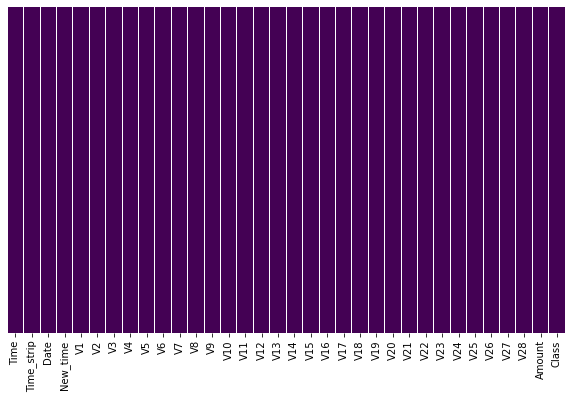

In [ ]:
#checking if there is any NULL data points
plt.figure(figsize=(10,6))
plt.style.use('seaborn-deep')
sns.heatmap(merge_df.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.show()

### There isn't any empty data points

 ## lets extract the time using the Date_time method 

In [10]:
import datetime
# lets strip the time  from the Time column and convert into 24hrs format. we shall inshiate the date 1/SEP/2013 for easing of understanding
merge_df.insert(1,'Time_strip',pd.to_datetime(merge_df.Time, unit='s',origin=pd.Timestamp('2013-09-01')))
merge_df.insert(2,'Date',merge_df['Time_strip'].dt.date)
merge_df.insert(3,'New_time',merge_df['Time_strip'].dt.time)




In [ ]:

merge_df

,Time,Time_strip,Date,New_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,2013-09-01 10:39:15,2013-09-01,10:39:15,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,2013-09-01 06:15:55,2013-09-01,06:15:55,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,2013-09-01 00:40:31,2013-09-01,00:40:31,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,2013-09-02 00:06:13,2013-09-02,00:06:13,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2013-09-02 11:20:02,2013-09-02,11:20:02,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,136579.0,2013-09-02 13:56:19,2013-09-02,13:56:19,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,0.915645,0.828552,1.230167,0.931780,-0.034924,-0.818625,-1.204194,-0.347605,0.826007,-0.238106,-0.458358,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0
56958,150070.0,2013-09-02 17:41:10,2013-09-02,17:41:10,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,0.195362,0.608261,-0.094271,-0.875176,-1.027551,-0.748960,0.574590,-0.117623,0.464547,0.178893,0.294948,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0
56959,138634.0,2013-09-02 14:30:34,2013-09-02,14:30:34,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,1.057616,1.024802,-0.275145,-0.495076,0.338903,-0.218791,1.065449,-0.025173,-0.796444,0.651121,-0.065957,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0
56960,53907.0,2013-09-01 14:58:27,2013-09-01,14:58:27,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,1.350845,0.323684,-0.140512,1.219719,-0.251542,0.633039,-0.857950,0.911287,-1.238865,-0.468457,-0.289844,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0


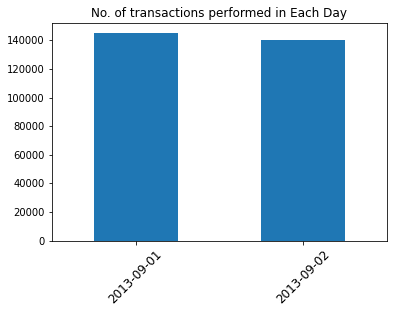

In [ ]:
# Lets Cross Check if we have correctly extracted Time by verifiying what Satement Suggest that We have Data of @ days of Transactions
merge_df.Date.value_counts().plot(kind='bar')
plt.title('No. of transactions performed in Each Day')
plt.xticks(fontsize=12,rotation=45)
plt.show()


In [ ]:
merge_df.New_time.describe()

count       284807
unique       74698
top       21:19:12
freq            39
Name: New_time, dtype: object

### Cheking the outliers in the data

In [ ]:
Columns=list(merge_df.columns)
for n in range(0,3):
    Columns.pop(1)
print(Columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


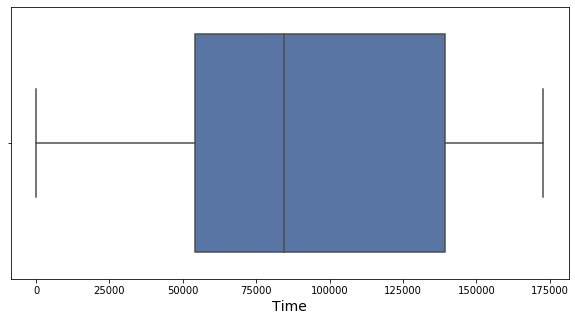

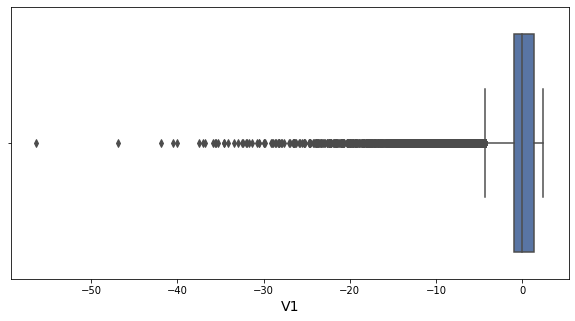

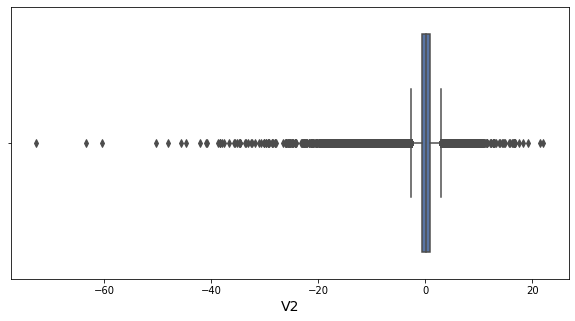

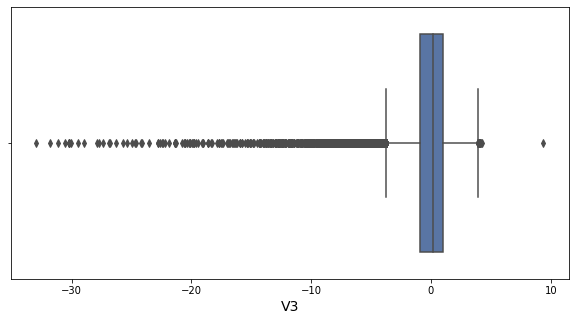

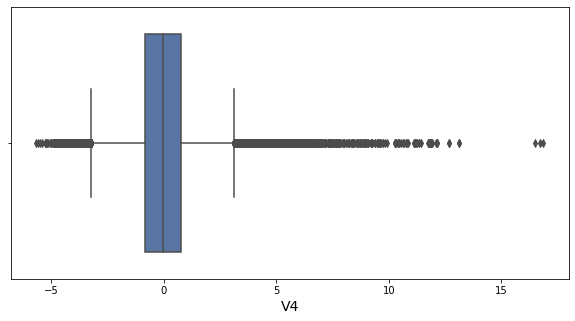

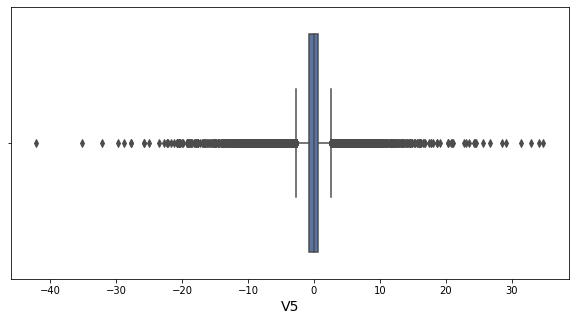

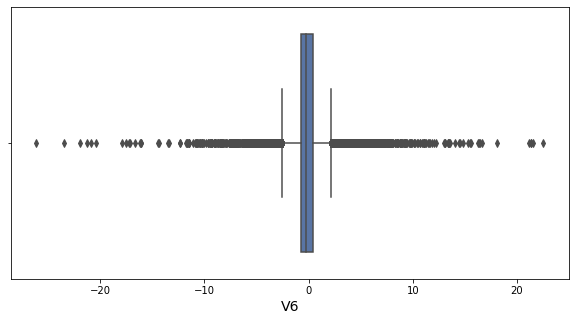

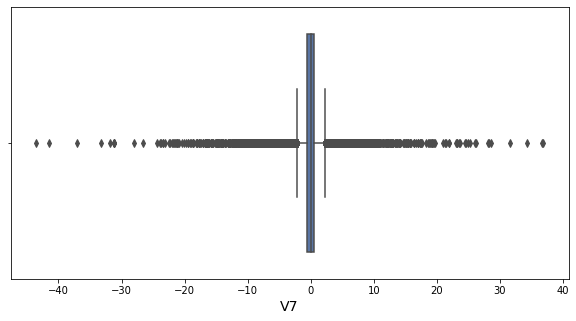

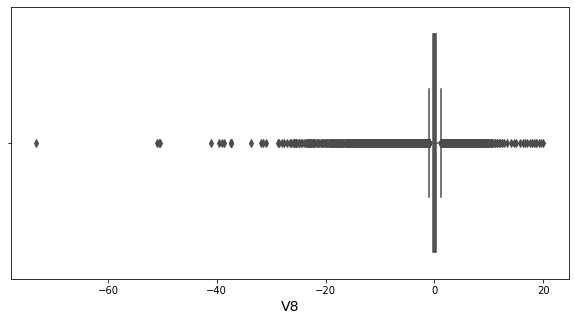

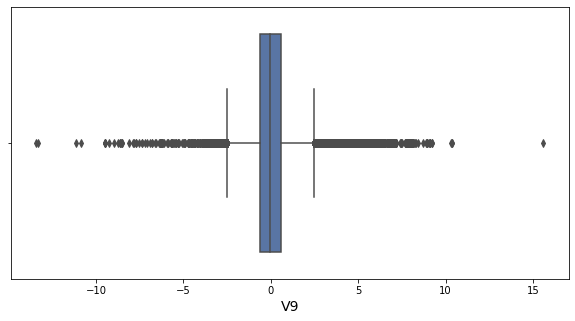

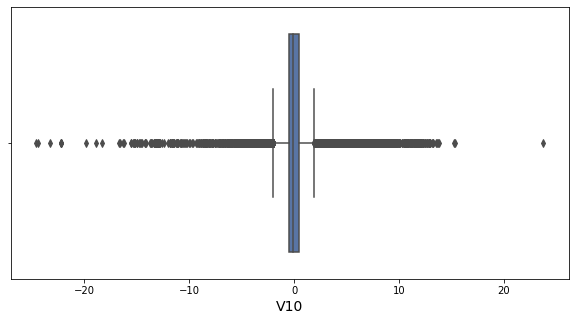

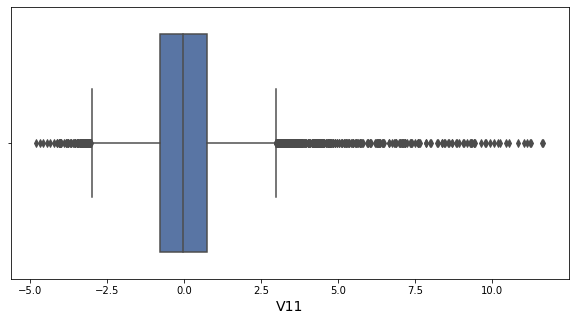

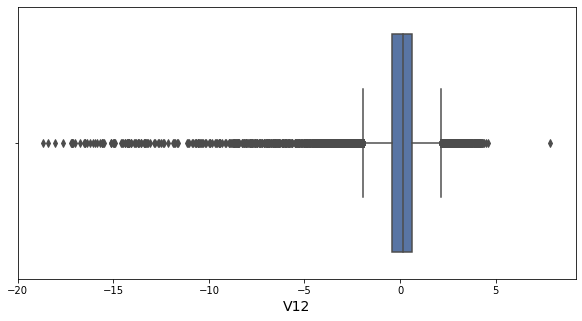

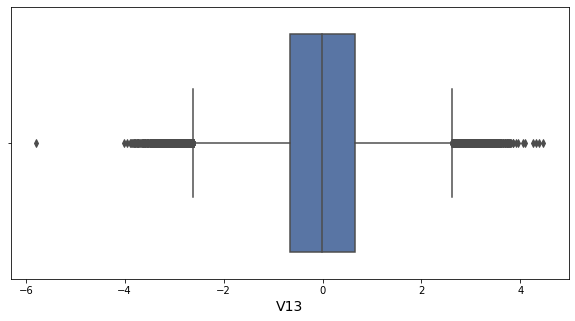

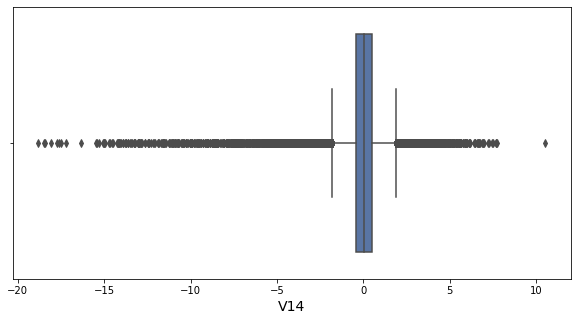

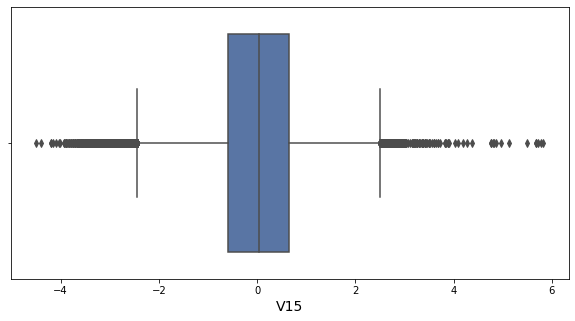

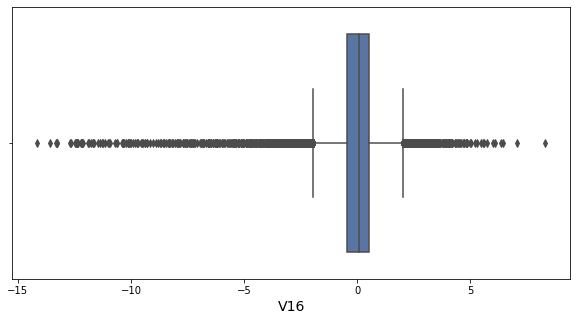

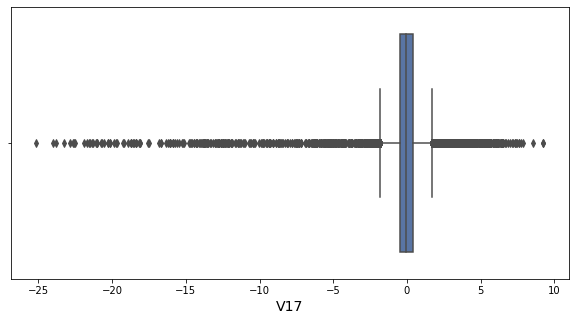

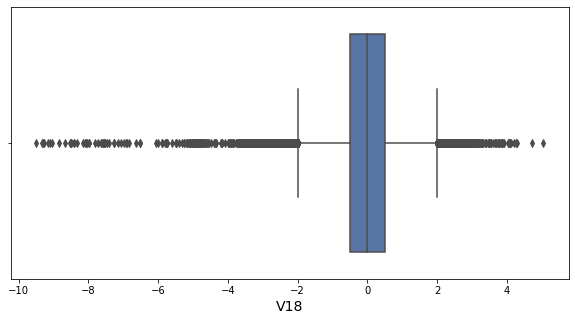

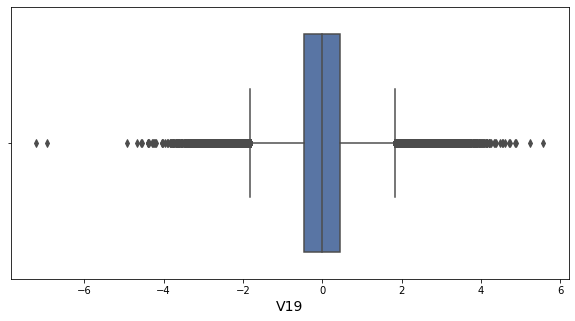

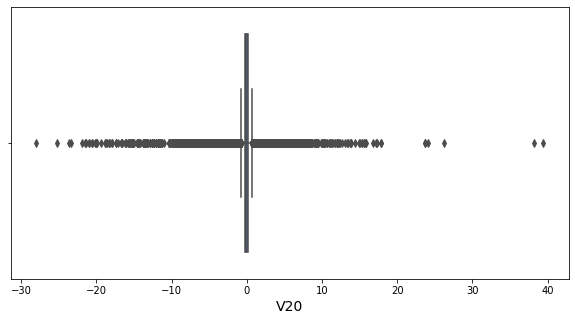

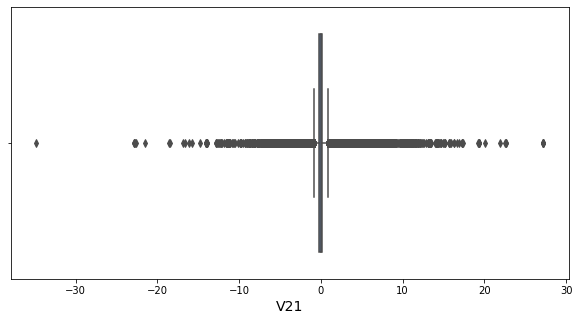

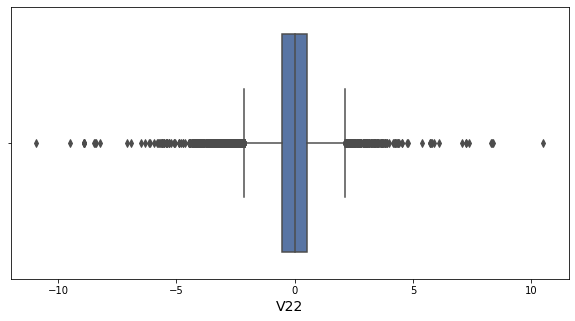

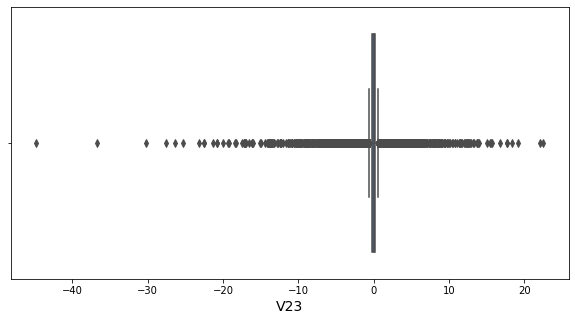

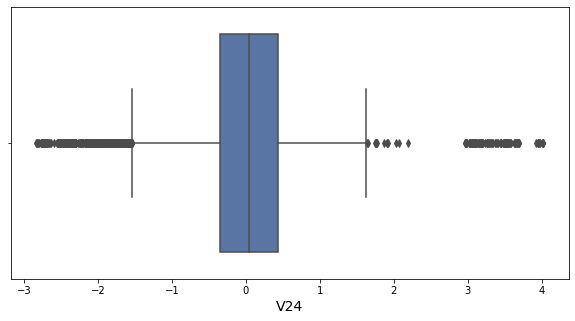

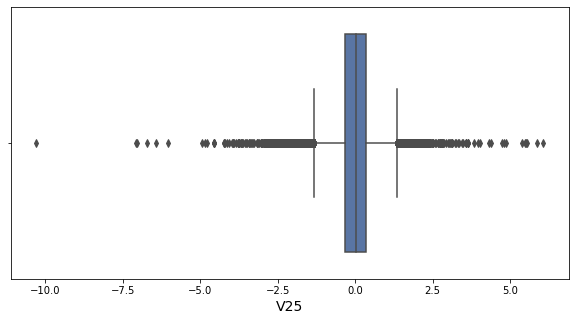

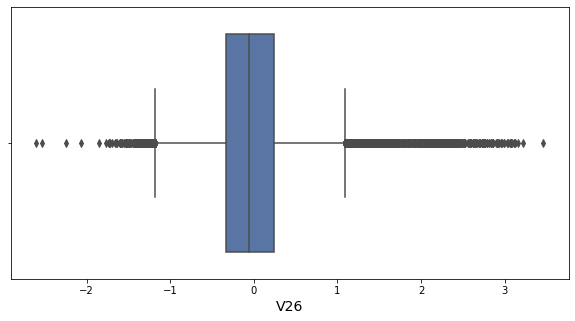

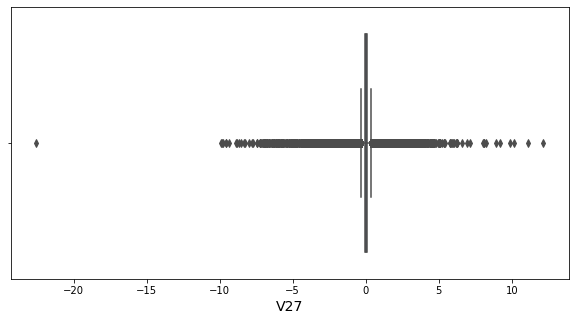

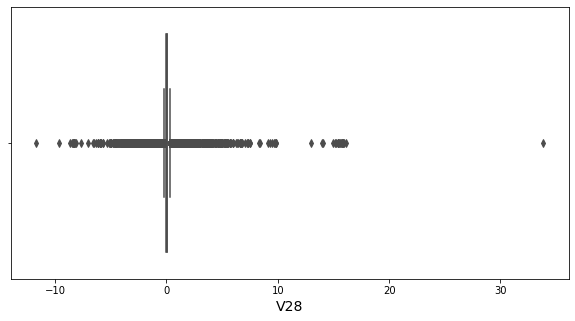

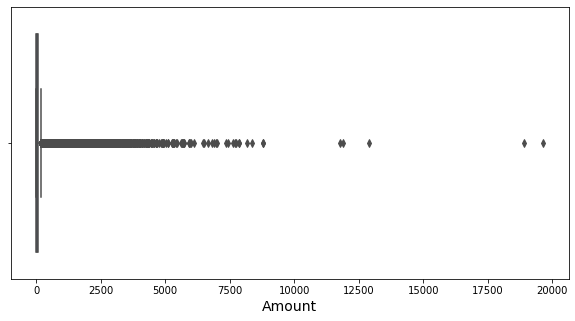

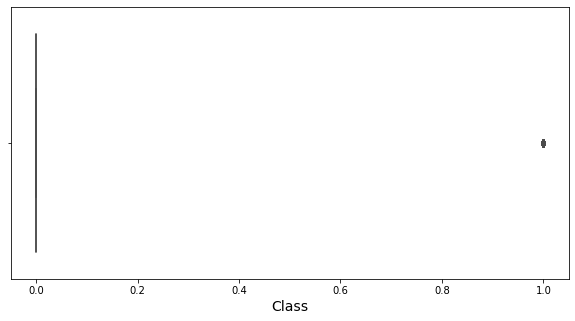

In [ ]:
for column in Columns:
    plt.figure(figsize=(10,5))
    sns.boxplot([column],data=train_df)
    plt.xlabel(column,fontsize=14)
    plt.show()

### We oberve that we have large number of outliers we shall counter this by droping Columns which effect the prediction of the models

### lets see the present data's features correlations b/w them*

In [ ]:
corr=merge_df.corr()

In [ ]:
# masking
m=np.ones_like(corr)
m[np.diag_indices_from(m)]=0
m[np.tril_indices_from(m)]=0


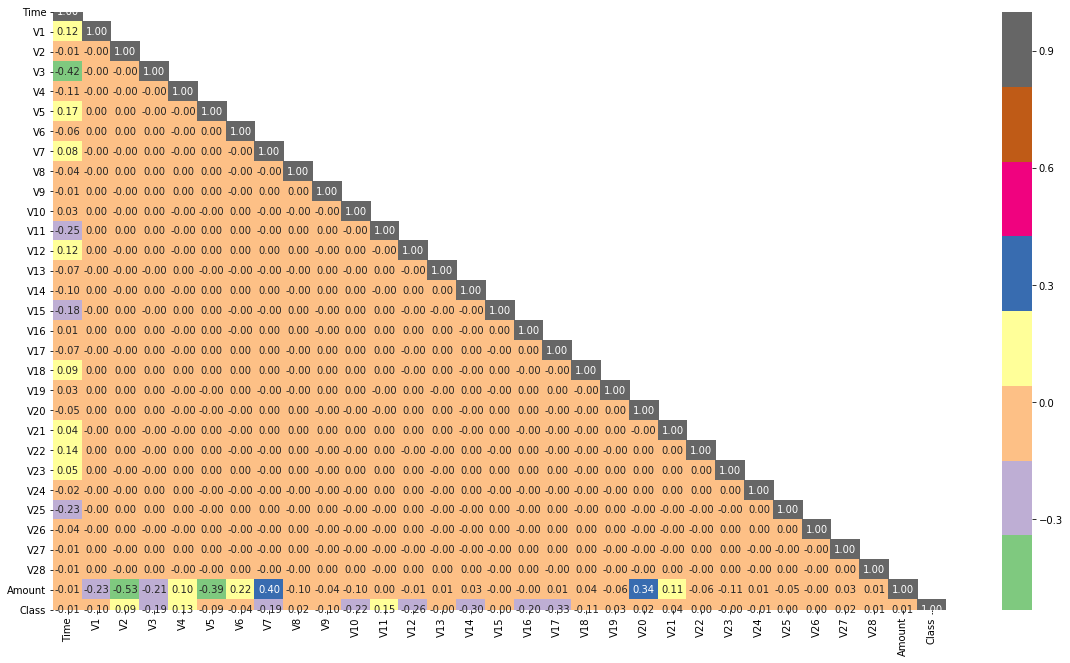

In [ ]:
plt.figure(figsize=(20,11))
sns.heatmap(corr,annot=True,cmap='Accent',mask=m,fmt='.2f')
plt.show()

 We observe that **V1,V2,V3,V5** show neagative corelation with Amount and **V10,V12,V14,V16,V17** Show NEGATIVE corr with Class

### Lets check the Variance of each columns

C:\Users\abhil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abhil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


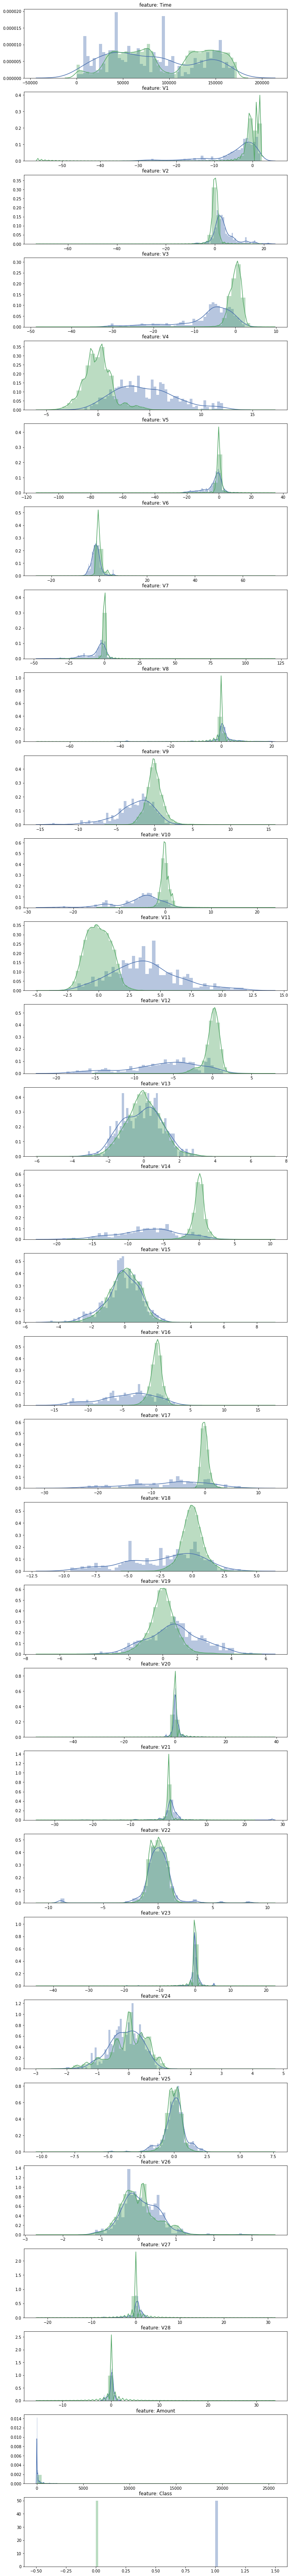

In [ ]:

plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(31, 1)

for i, cn in enumerate(Columns):
   ax = plt.subplot(gs[i])
   sns.distplot(merge_df[cn][merge_df.Class == 1], bins=50)
   sns.distplot(merge_df[cn][merge_df.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(cn))
plt.show()


### **This dataset is very clean and doesn't contain any NAs, so the cleaning we did in this section is to drop some variables which have Zero or very low variance, normalize the Amount variable which is the only variable that has not been normalized yet, and resampling the dataset.**


In [35]:
## Through above observation we shall drop features we don't find important in model builing and prediction
merge_df=merge_df.drop(['V2','V3','V5','V6','V7','V8','V21','V27','V28'],axis=1)

train_df=train_df.drop(['V2','V3','V5','V6','V7','V8','V21','V27','V28'],axis=1)

val_df=val_df.drop(['V2','V3','V5','V6','V7','V8','V21','V27','V28'],axis=1)

test_df=test_df.drop(['V2','V3','V5','V6','V7','V8','V21','V27','V28'],axis=1)


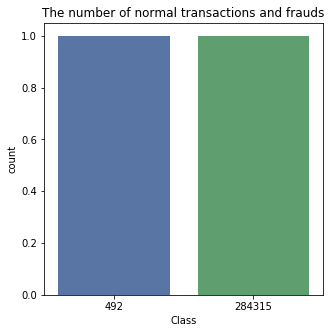

In [ ]:
# Checking thge balance of the data
plt.figure(figsize=(5,5))
sns.countplot(merge_df['Class'].value_counts())
plt.title('The number of normal transactions and frauds')
plt.xlabel('Class')
plt.show()

### We can observe that the diffwrence b/w the classes is very large, this is classisc case of imblance data

In [ ]:
# Extrating the fraud and non_fraudulnte data

fraud=merge_df.loc[merge_df.Class==1]
non_fraud=merge_df.loc[merge_df.Class==0]

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


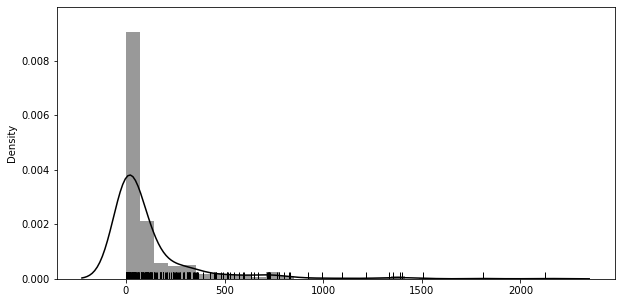

In [ ]:
# Fraudulate amount overview
plt.figure(figsize=(10,5))
sns.distplot(fraud.Amount.values, bins=30, rug=True,kde=True,color='Black')
plt.show()

### We observe that the large numbers of the faruds amount is below 100 , That is the faruds are carried out with small amount rather than big amount, as they may rise alrams 

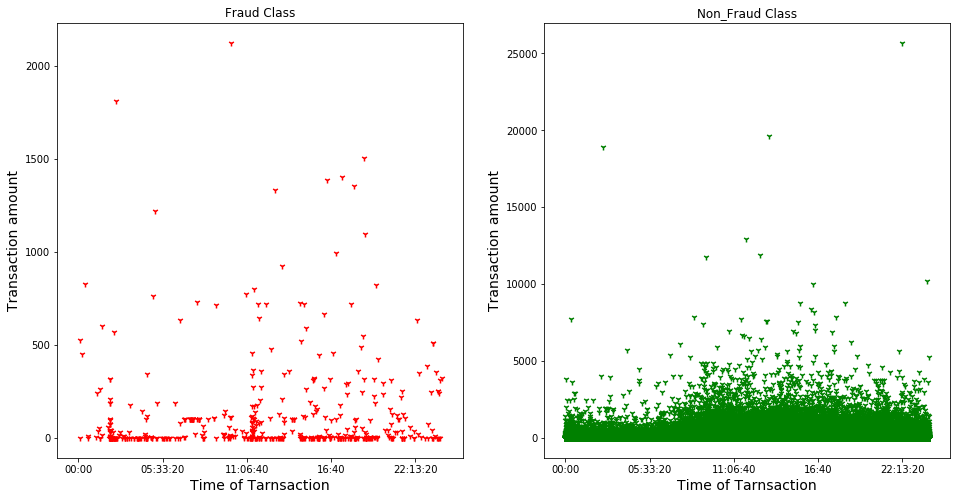

In [ ]:
# The time around which trasactions taking place
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(16,8),sharex=True)


ax1.scatter(y='Amount',x=fraud.New_time.values,data=fraud,marker='1',c='r')
ax1.set_title('Fraud Class')
ax1.set_xlabel('Time of Tarnsaction', fontsize=14)
ax1.set_ylabel('Transaction amount', fontsize=14)

ax2.scatter(y='Amount',x=non_fraud.New_time.values,data=non_fraud,marker='1',c='g')
ax2.set_title('Non_Fraud Class')
ax2.set_xlabel('Time of Tarnsaction', fontsize=14)
ax2.set_ylabel('Transaction amount', fontsize=14)
plt.show()


### From the above plots
1. Most of the fraud transations is carried at small amount of 1EURs to be acuurate .
2. we can say that significant number of the frauds happen and increases around 11'o Clock and  even the amount during this slightly high.
3. We can also Observe that  most of the Higher Amount Frauds happen b/w range 11'o to 8'o clock in the evening with strong numbers of transaction around 4'o clock to 6'o clock
4. We also observe that there is a strong number of frauds happening in late hours of the night b/w Midnight to early Morning,This transation are carried with less amount range

## We shall use method of under sampling and over sampling to tackel the class imbalance and We shall also Scale the Amount features has it shows large spread of data with less variance

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Scaling the model using Robust Scaler over Min_Max sience the data contains large no of outliers
scaler=RobustScaler()
train_df['Amount_Stand'] = scaler.fit_transform(train_df['Amount'].values.reshape(-1,1))
val_df['Amount_Stand'] = scaler.fit_transform(val_df['Amount'].values.reshape(-1,1))
test_df['Amount_Stand'] = scaler.fit_transform(test_df['Amount'].values.reshape(-1,1))
 

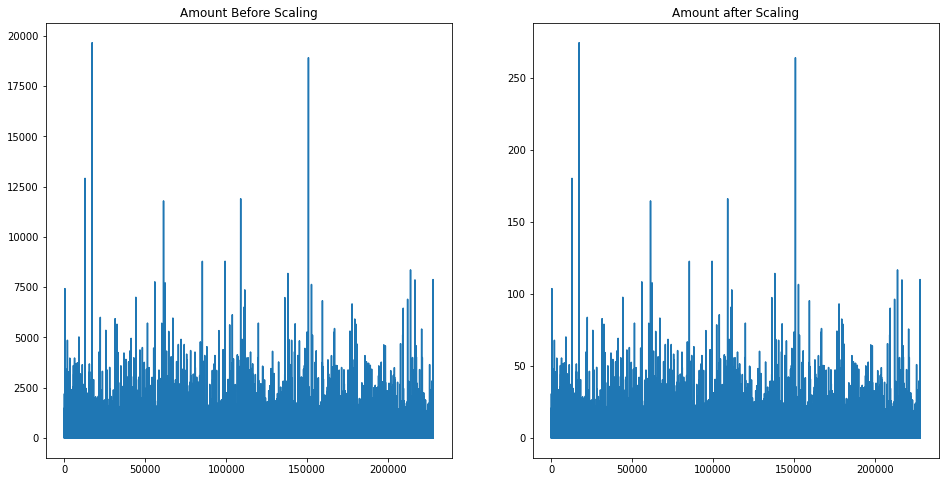

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8),sharex=True)
ax1.plot(train_df.Amount)
ax1.set_title('Amount Before Scaling')

ax2.plot(train_df.Amount_Stand)
ax2.set_title('Amount after Scaling')
plt.show()

### We can observe that Amount after Standersing, has decrese the range of the amount Spread without affecting its values importance

### Data Preparartion and tackling the imbalanced problem 

In [36]:
X = train_df.drop(['Class','Amount'],axis=1)  
y = train_df['Class']

In [37]:
X.shape

(227845, 21)

In [ ]:
#Under Sampling the majority class to balance the data
cc = ClusterCentroids(random_state=5)
X_resampled, y_resampled = cc.fit_resample(X,y)

In [ ]:
print(sorted(Counter(y_resampled).items()))

[(0, 394), (1, 394)]


In [ ]:
# Over Sampling the classes in data
Ros=RandomOverSampler()
X_ovr_sampled, y_ovr_sampled = Ros.fit_resample(X,y)

In [ ]:
print(sorted(Counter(y_ovr_sampled).items()))

[(0, 227451), (1, 227451)]


In [ ]:
print('Before: Under_Sampling',y.value_counts(),sep='\n')
print()
print('After: Under_Sampling',y_resampled.unique(),sep='\n')

Before: Under_Sampling
0    227451
1       394
Name: Class, dtype: int64

After: Under_Sampling
[0 1]


In [ ]:
print('Before: Over_Sampling',y.value_counts(),sep='\n')
print()
print('After: Over_Sampling',y_ovr_sampled.value_counts(),sep='\n')

Before: Over_Sampling
0    227451
1       394
Name: Class, dtype: int64

After: Over_Sampling
1    227451
0    227451
Name: Class, dtype: int64


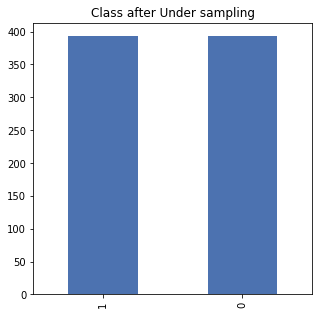

In [ ]:
plt.figure(figsize=(5,5))
y_resampled.value_counts().plot(kind='bar')
plt.title('Class after Under sampling')
plt.show()

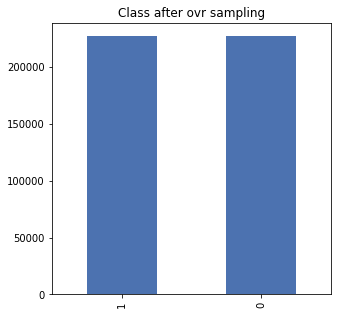

In [ ]:
plt.figure(figsize=(5,5))
y_ovr_sampled.value_counts().plot(kind='bar')
plt.title('Class after ovr sampling')
plt.show()

### creating validation data split

In [43]:
X_val = val_df.drop(['Class','Amount'],axis=1)  
y_val = val_df['Class']

X_val.shape

(56962, 21)

In [ ]:
# PCA # Optional 
pca=PCA()

X_train_pca=pca.fit_transform(X_train)
X_val_pca=pca.fit_transform(X_val)

explained_variance = pca.explained_variance_ratio_  
explained_variance

array([9.99999898e-01, 7.84510445e-08, 8.83250564e-09, 5.52393305e-09,
       4.08812626e-09, 9.95060323e-10, 8.04145015e-10, 7.48835062e-10,
       6.95104890e-10, 4.29617219e-10, 3.93738238e-10, 2.88893428e-10,
       1.82723579e-10, 1.72642855e-10, 1.24198103e-10, 1.00142464e-10,
       7.64906867e-11, 7.56572229e-11, 5.76875786e-11, 4.30090801e-11,
       3.63755031e-11, 1.97709912e-11, 1.57161618e-11, 1.37089710e-11])

## Week 2

Modeling Techniques:
Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
Use different Tree-based classifiers like Random Forest and XGBoost. 


# Machine Learning model buildng and training

### *Train the Models* : First we shall trainthe model on under Sampled data and Predict the result and Even train on over sampled data and predict and Compare the models over Accuracy and F1 Score

In [15]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [17]:
# Train the models on under Sampled data 
# Train Logistic Regression model
Log_clf=LogisticRegression(solver='liblinear')
Log_clf.fit(X_resampled,y_resampled)


# Train Navie Bayes
NB_clf=BernoulliNB(fit_prior=True)
NB_clf.fit(X_resampled,y_resampled)

#Train SVM based SGD classifier
SGD_clf=SGDClassifier(loss='modified_huber',
                      random_state=5)

SGD_clf.fit(X_resampled,y_resampled)




### **Evaluate the models** : We shall use Repeated k Flod of evaluate our model

In [18]:
import sklearn
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [28]:
moodel_list=[('Logistic Regression Classifier ',Log_clf),('Navie Base BernoulliNB',NB_clf),
             ('SGD Classifer',SGD_clf)]

models=[m for m in moodel_list]
print(models)

[('Logistic Regression Classifier ', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('Navie Base BernoulliNB', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)), ('SGD Classifer', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False))]


================ *Model Evaluation Results* ================= 

===== Logistic Regression Classifier  =====
Cross Validation Mean Score:  96.2%

Model Accuracy:  96.7%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix:



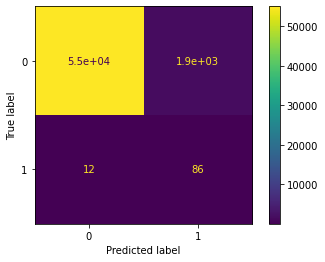

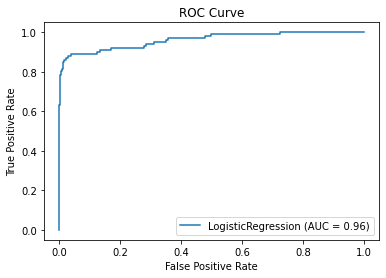

===== Navie Base BernoulliNB =====
Cross Validation Mean Score:  94.3%

Model Accuracy:  84.7%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     56864
           1       0.01      0.90      0.02        98

    accuracy                           0.85     56962
   macro avg       0.50      0.87      0.47     56962
weighted avg       1.00      0.85      0.92     56962


Confusion Matrix:



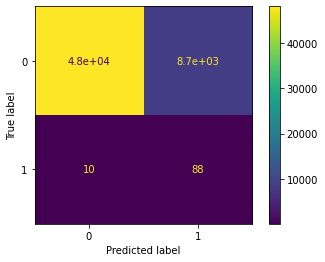

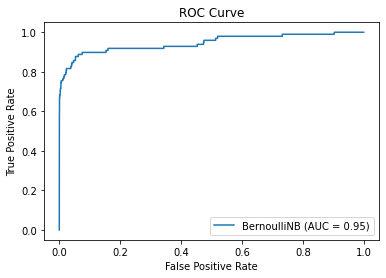

===== SGD Classifer =====
Cross Validation Mean Score:  50.0%

Model Accuracy:  99.8%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



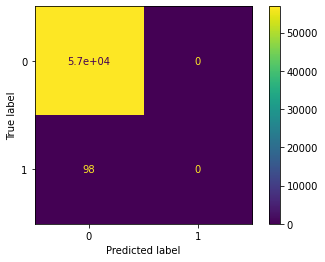

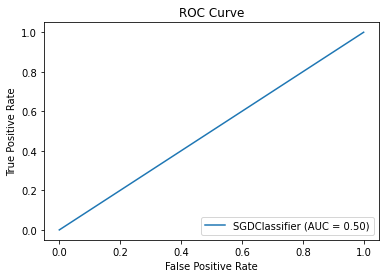

In [29]:
print('================ *Model Evaluation Results* =================','\n')

for i,v in models:
    pred=v.predict(X_val)
    scores=cross_val_score(v,X_resampled,y_resampled,cv=cv)
    accu=accuracy_score(y_val,pred)
    con_matrix=confusion_matrix(y_val,pred)
    clf_rep=classification_report(y_val,pred,zero_division=0)
    
    print('===== {} ====='.format(i))
    
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
    print()
    print("Classification Report:" "\n", clf_rep) 
    print()
    print("Confusion Matrix:")
    sklearn.metrics.plot_confusion_matrix(v,X_val,y_val)
    print()
    
    sklearn.metrics.plot_roc_curve(v,X_val,y_val)
    plt.title('ROC Curve')
    plt.show()

### Above is the Evalulation of the models using the under sampled data points.

1. We obverve that the LOGISTIC Regression and the Navie Based have good Cross Validation score.

       Models prediction Accuracy : Logistics Classifier   -             95 %
                                    Navie Based Classifier -             72 %
                                    Stochastic Gradient Descent (SGD)-   99 %
 F1 score :
                Logistics Classifier  |   Navie Based  |  SGD
            
       class 0:      0.97              |     0.84      |   1
   
       class 1 :     0.08              |     0.02      |   0




In [ ]:
# Training the model on over Sampled data
Log_clf.fit(X_ovr_sampled, y_ovr_sampled)
NB_clf.fit(X_ovr_sampled, y_ovr_sampled)
SGD_clf.fit(X_ovr_sampled, y_ovr_sampled)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

================ *Model Evaluation Results for Over Sampling* ================= 

===== Logistic Regression Classifier  =====
Cross Validation Mean Score:  93.30000000000001%

Model Accuracy:  96.5%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix:



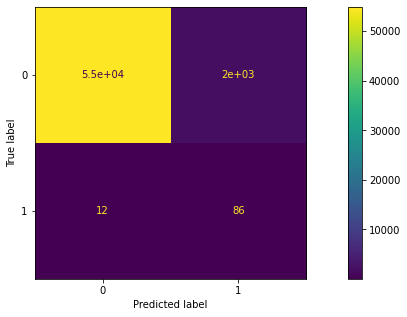

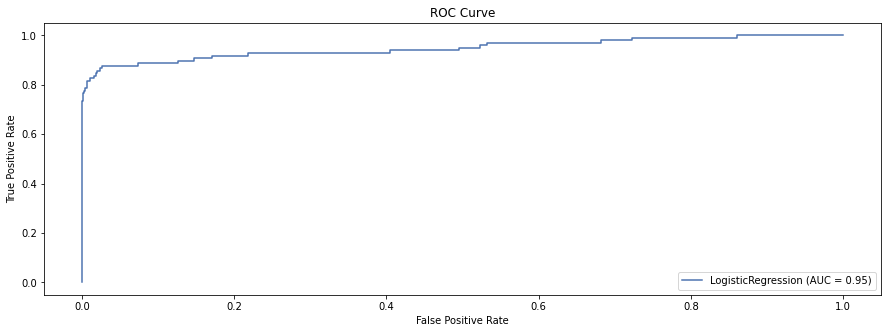

===== Navie Base BernoulliNB =====
Cross Validation Mean Score:  91.2%

Model Accuracy:  97.5%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.05      0.79      0.10        98

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.54     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:



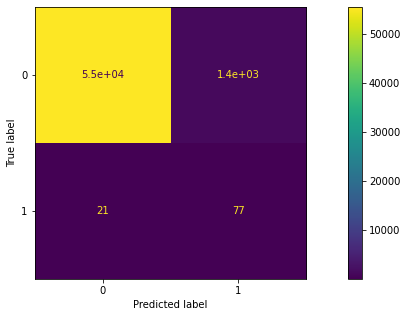

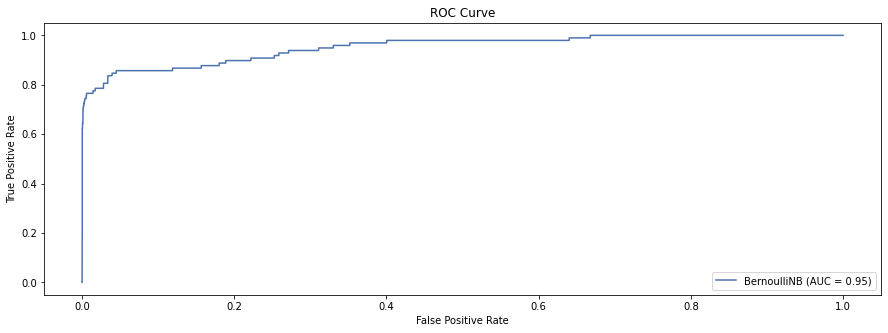

===== SGD Classifer =====
Cross Validation Mean Score:  71.5%

Model Accuracy:  99.1%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.09      0.49      0.15        98

    accuracy                           0.99     56962
   macro avg       0.54      0.74      0.57     56962
weighted avg       1.00      0.99      0.99     56962


Confusion Matrix:



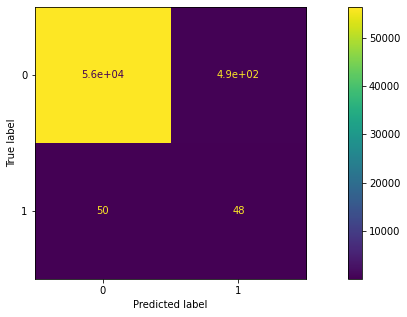

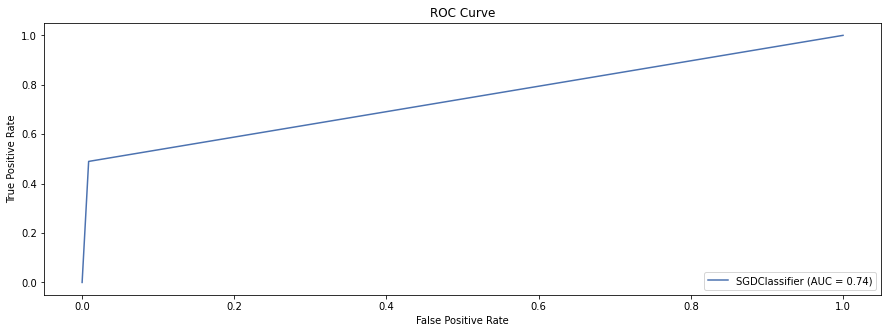

In [ ]:
print('================ *Model Evaluation Results for Over Sampling* =================','\n')

for i,v in models:
    pred=v.predict(X_val)
    scores=cross_val_score(v,X_ovr_sampled,y_ovr_sampled,cv=10)
    accu=accuracy_score(y_val,pred)
    con_matrix=confusion_matrix(y_val,pred)
    clf_rep=classification_report(y_val,pred)
    
    print('===== {} ====='.format(i))
    
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
    print()
    print("Classification Report:" "\n", clf_rep) 
    print()
    print("Confusion Matrix:")
    sklearn.metrics.plot_confusion_matrix(v,X_val,y_val)
    print()
    
    sklearn.metrics.plot_roc_curve(v,X_val,y_val)
    plt.title('ROC Curve')
    plt.show()

### Above is the Evalulation of the models using the Over sampled data points.

1. We obverve that the LOGISTIC Regression and the Navie Based have good Cross Validation score.

       Models prediction Accuracy : Logistics Classifier   -             96  %
                                    Navie Based Classifier -             97 %
                                    Stochastic Gradient Descent (SGD)-   99 %
 F1 score :
                Logistics Classifier  |   Navie Based  |  SGD
            
       class 0:      0.97              |     0.99      |   1
   
       class 1 :     0.05              |     0.10     |   0.15

### Test the model using the actual test data

In [51]:
X_test=test_df.drop(['Amount'],axis=1)
X_test.shape

(56962, 21)

================ *Result for Model Trained on Under Sampled Data * ================= 

===== Logistic Regression Classifier  =====

Model Accuracy:  94.8%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.88      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.91      0.51     56962
weighted avg       1.00      0.95      0.97     56962


Confusion Matrix:



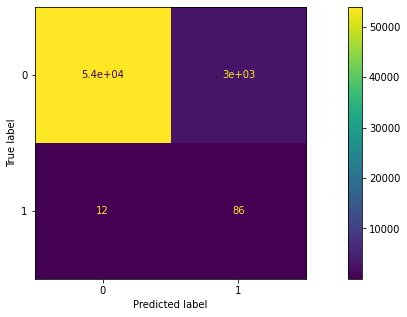

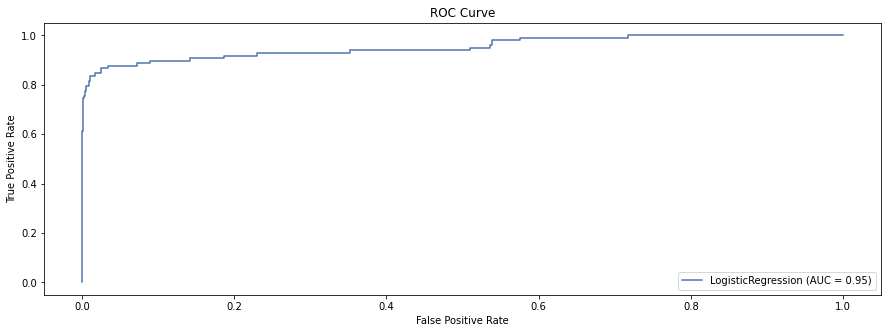

===== Navie Base BernoulliNB =====

Model Accuracy:  72.39999999999999%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84     56864
           1       0.01      0.94      0.01        98

    accuracy                           0.72     56962
   macro avg       0.50      0.83      0.43     56962
weighted avg       1.00      0.72      0.84     56962


Confusion Matrix:



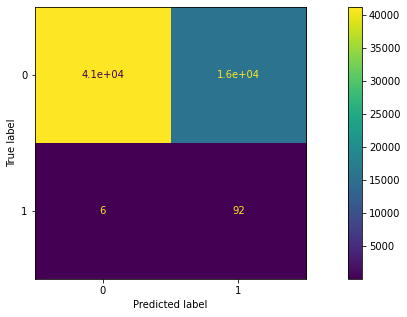

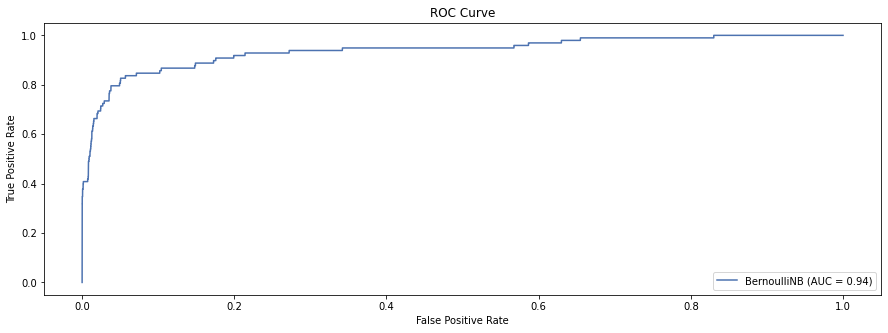

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


===== SGD Classifer =====

Model Accuracy:  99.8%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



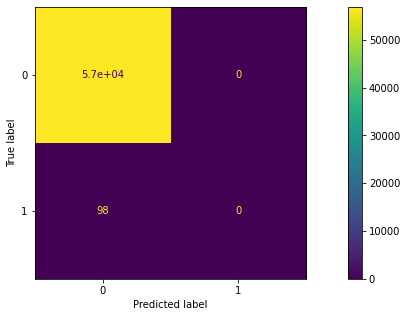

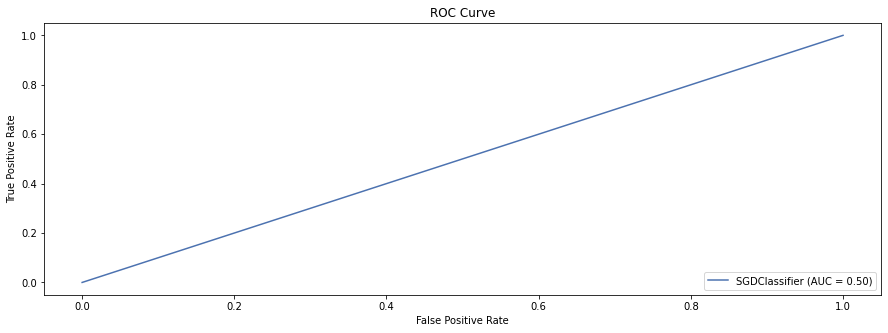

In [ ]:
print('================ *Result for Model Trained on Under Sampled Data * =================','\n')
classdict = {'normal':0, 'fraudulent':1}
for i,v in models:
    pred=v.predict(X_test)
    accu=accuracy_score(y_val,pred)
    con_matrix=confusion_matrix(y_val,pred)
    clf_rep=classification_report(y_val,pred)
    
    print('===== {} ====='.format(i))
     
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
    print()
    print("Classification Report:" "\n", clf_rep) 
    print()
    print("Confusion Matrix:")
    sklearn.metrics.plot_confusion_matrix(v,X_test,y_val)
    print()
    

    sklearn.metrics.plot_roc_curve(v,X=X_test,y=y_val)
    plt.title('ROC Curve')
    plt.show()

================ *Result for Model Trained on Over Sampled Data * ================= 

===== Logistic Regression Classifier  =====

Model Accuracy:  96.5%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix:



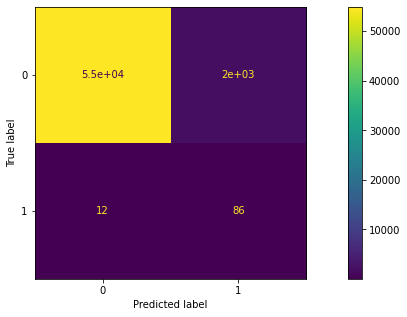

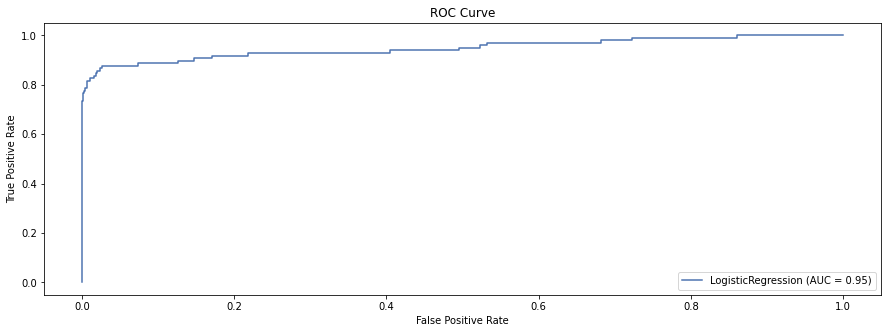

===== Navie Base BernoulliNB =====

Model Accuracy:  97.5%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.05      0.79      0.10        98

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.54     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:



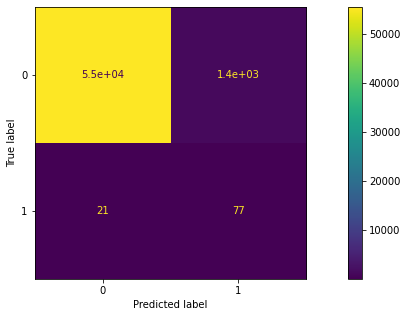

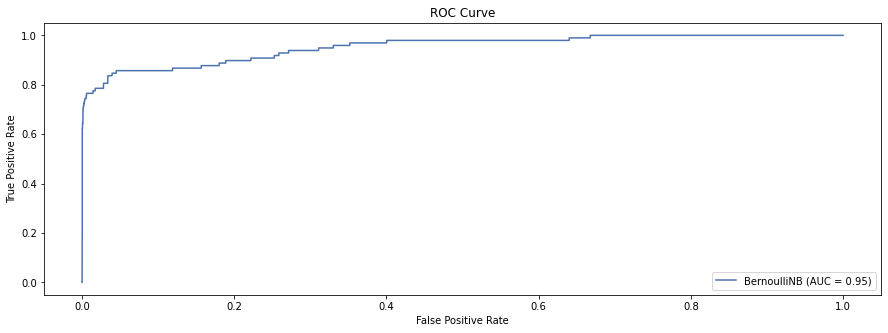

===== SGD Classifer =====

Model Accuracy:  99.1%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.09      0.49      0.15        98

    accuracy                           0.99     56962
   macro avg       0.54      0.74      0.57     56962
weighted avg       1.00      0.99      0.99     56962


Confusion Matrix:



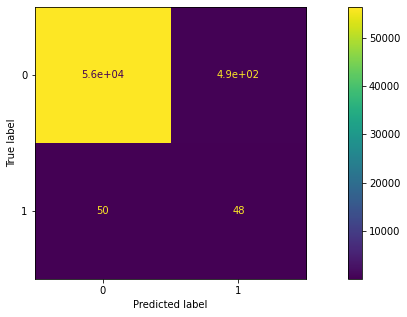

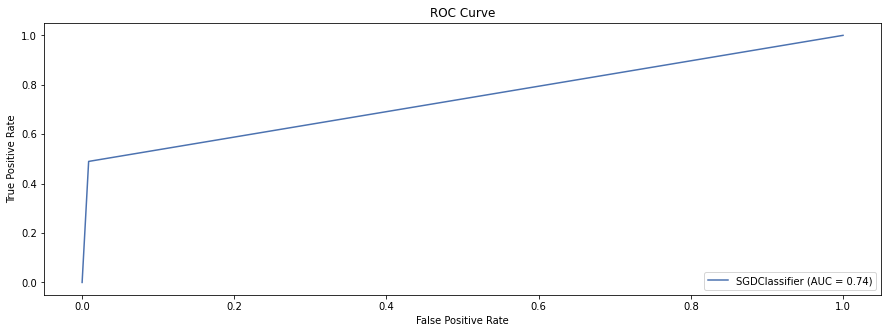

In [ ]:
print('================ *Result for Model Trained on Over Sampled Data * =================','\n')
classdict = {'normal':0, 'fraudulent':1}
for i,v in models:
    pred=v.predict(X_test)
    accu=accuracy_score(y_val,pred)
    con_matrix=confusion_matrix(y_val,pred)
    clf_rep=classification_report(y_val,pred)
    
    print('===== {} ====='.format(i))
     
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
    print()
    print("Classification Report:" "\n", clf_rep) 
    print()
    print("Confusion Matrix:")
    sklearn.metrics.plot_confusion_matrix(v,X_test,y_val)
    print()
    

    sklearn.metrics.plot_roc_curve(v,X=X_test,y=y_val)
    plt.title('ROC Curve')
    plt.show()

 Below Tabel Shows the Comparision of All three models build, Trained and Evaluated on 
 1. Under Sampled Data Set
 2. Over Sampled Data Set

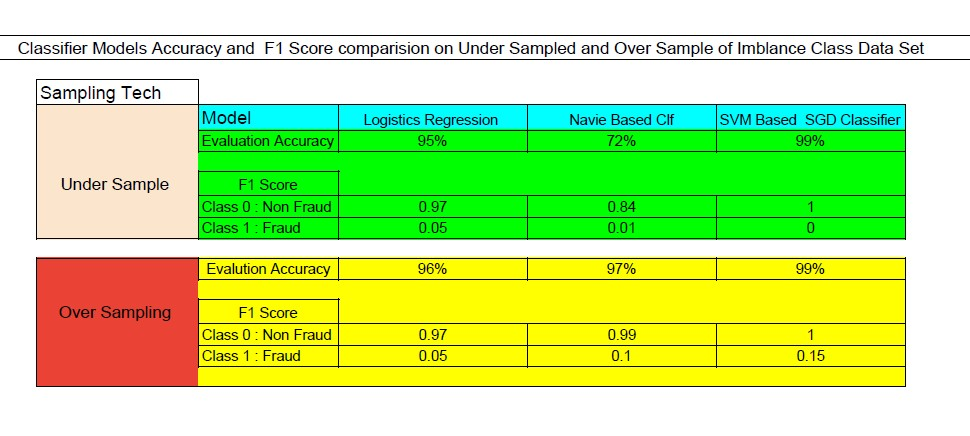

From Above Comparision we can Conlude following 

1. The Models Have Good Accuracy score , But show poor F1 score in the Minoerity class prediction but Excel in prediction of Dominat class,they fail in Prediction of the Smaller Class 

2. Logistics Regression Model Dosen't show any defference in Acuuracy for both Smapling Technices and F1 Score remains same in both the method for both classes.

3. Navie Based Bernoulli Classifier Show siginficant imporvement in Accuracy and Slight improvment of 10% in F1 Score for both the classes

4. SGD model has the best accuracy yet have the worst F1 score. 
This model fail to predict the fraud class in unders sampled tech. But shows better performance in Over sampling tech.

### Using the random forest classifier along with class imblance correction features 
### We shall use class weight age to counter the class imbalance problem.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
#split the data with out sampling the data 
Rf_X,Rf_y=X,y

In [ ]:

# Train RandomForest Classifier
RF_clf=RandomForestClassifier(criterion='entropy',max_depth=5,class_weight='balanced_subsample')
RF_clf.fit(Rf_X,Rf_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

================ * RF Model Evaluation Results* ================= 

=====Random Forest Classifier =====
Cross Validation Mean Score:  99.9%

Model Accuracy:  99.8%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.85      0.64        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



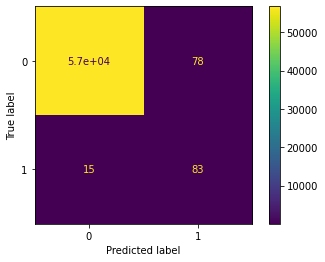

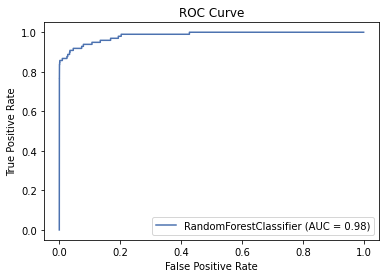

===================Test Result of the Model=================

Model Accuracy:  99.8%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.85      0.64        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



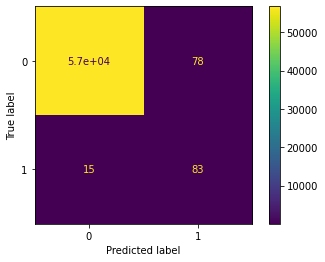

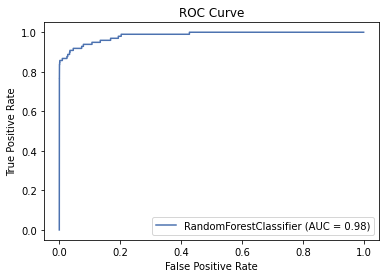

In [ ]:
print('================ * RF Model Evaluation Results* =================','\n')

pred=RF_clf.predict(X_val)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(RF_clf,Rf_X,Rf_y,cv=cv)
accu=accuracy_score(y_val,pred)
con_matrix=confusion_matrix(y_val,pred)
clf_rep=classification_report(y_val,pred)
    
print('=====Random Forest Classifier =====')
    
print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
print("Confusion Matrix:")
sklearn.metrics.plot_confusion_matrix(RF_clf,X_val,y_val)
print()
    
sklearn.metrics.plot_roc_curve(RF_clf,X_val,y_val)
plt.title('ROC Curve')
plt.show()
    
print('===================Test Result of the Model=================')   
pred=RF_clf.predict(X_test)
accu=accuracy_score(y_val,pred)
con_matrix=confusion_matrix(y_val,pred)
clf_rep=classification_report(y_val,pred)
    

     
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
print("Confusion Matrix:")
sklearn.metrics.plot_confusion_matrix(RF_clf,X_test,y_val)
print()
    

sklearn.metrics.plot_roc_curve(RF_clf,X=X_test,y=y_val)
plt.title('ROC Curve')
plt.show()

Above is the Evalulation of the Ensembled based Random forest alogo without any Pre prossecing of the data to counter the IMblance in the calss .
 The model Uses the functon of Class weightage : where both the class are assigned particular weightage. I used 'balanced_subsample' method where . Data is subsampled randomly and both class are assigned Weigate to tackel the imblance.

1. We obverve that the .

       Models prediction Accuracy : Random Forest   -       98.3  %
                                    
 F1 score :
                  Random Forest Classifier   
            
       class 0:        0.99              |
    
       class 1 :       0.64            |  

###  Using XG Boost Classifier
 The XGBoost classifier has the method of wegihtage to deal with the class imblance in the data, We shall use this method to tackel the class imbalance in our data, Insted of Standardising the data through Under Sampling or Over Sampling .

In [19]:
from xgboost.sklearn import XGBClassifier
from collections import Counter

In [20]:
X_gb_train,y_gb_train=X,y

In [21]:
X_gb_train.shape,y_gb_train.shape

((227845, 30), (227845,))

In [32]:
# count examples in each class
counter = Counter(y)
# estimate scale_pos_weight value
weight = counter[1] / counter[0]
print('Weightage sholud be given to majority class during classification is :',weight)


Weightage sholud be given to majority class during classification is : 0.0017322412299792043


In [33]:
# define model
XGB_clf = XGBClassifier(scale_pos_weight=1/0.001732,max_depth=5)

In [34]:
XGB_clf.fit(X_gb_train,y_gb_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=577.3672055427252,
              seed=None, silent=None, subsample=1, verbosity=1)

=================Model Evalution=================
Cross Validation Mean Score:  97.6%

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.83      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



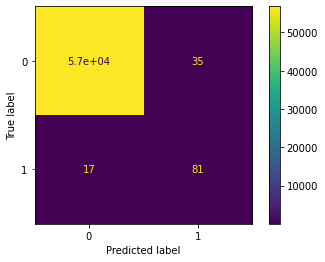

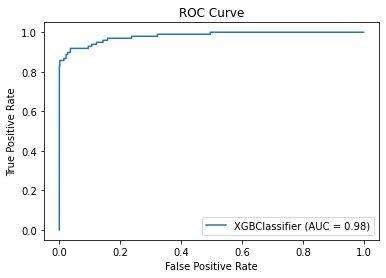

===================Test Result of the Model=================

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.83      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



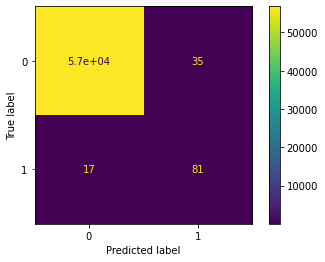

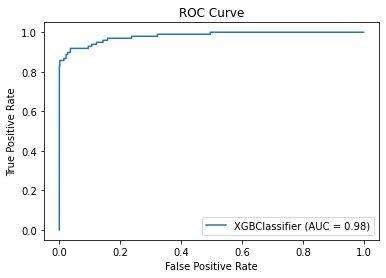

In [35]:
print("=================Model Evalution=================")
y_pred=XGB_clf.predict(X_val)
scores = cross_val_score(XGB_clf, X_gb_train, y_gb_train, scoring='roc_auc', cv=cv, n_jobs=-1)
accu=accuracy_score(y_val,y_pred)
con_matrix=confusion_matrix(y_val,y_pred)
clf_rep=classification_report(y_val,y_pred)
   

print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100)) 
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
print("Confusion Matrix:")
sklearn.metrics.plot_confusion_matrix(XGB_clf,X_val,y_val)
print()
    

sklearn.metrics.plot_roc_curve(XGB_clf,X=X_test,y=y_val)
plt.title('ROC Curve')
plt.show()


print('===================Test Result of the Model=================')   
pred=XGB_clf.predict(X_test)
accu=accuracy_score(y_val,pred)
con_matrix=confusion_matrix(y_val,pred)
clf_rep=classification_report(y_val,pred)
    

     
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
print("Confusion Matrix:")
sklearn.metrics.plot_confusion_matrix(XGB_clf,X_test,y_val)
print()
    

sklearn.metrics.plot_roc_curve(XGB_clf,X=X_test,y=y_val)
plt.title('ROC Curve')
plt.show()

 The Above Evalution shows that the Boosted Gradient classifier anlong with Class Imbalance correction method through is Best performing Classifier till now.

 The Model has a high Accuracy and Cross Val Score.

  F1 Score of Class 1 (fraud) : is 0.76 which is a decent score

### We shall fine tune the model by tuning the HyperParameters using GridSearchCV if we can imporve the preformance of the model.

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
para={'learning_rate':[0.01,0.1,0.2],'max_depth': [5,7,10]}

In [24]:
para

{'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [5, 7, 10]}

In [38]:
grid=GridSearchCV(XGB_clf,param_grid=para,scoring='roc_auc',cv=cv)


In [ ]:

 grid_result=grid.fit(X_gb_train,y_gb_train)

In [ ]:
grid_result.best_params_

In [ ]:
grid_result.best_estimator_

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



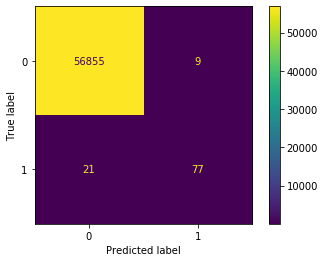

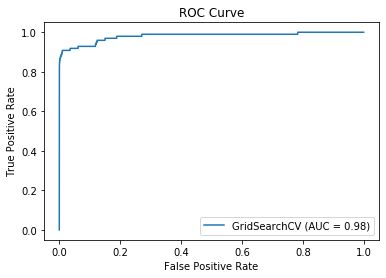

In [ ]:
y_pred=grid_result.predict(X_test)
  
accu=accuracy_score(y_val,y_pred)
con_matrix=confusion_matrix(y_val,y_pred)
clf_rep=classification_report(y_val,y_pred)

print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
print("Confusion Matrix:")
sklearn.metrics.plot_confusion_matrix(grid_result,X_test,y_val)
print()
    
sklearn.metrics.plot_roc_curve(grid_result,X=X_test,y=y_val)
plt.title('ROC Curve')
plt.show()

Through Use of GridSearchCV we are able to increase the F1 Score of the XGBoost Classifier from 0.76 to 0.84 an large impovement model performance .

 ## The Best Parameters extracted from the Grid is :
        Learning Rate - 0.1
        Max Depth    -  10
        Weight -     1/0.001 

### Lets try one more model from Ensembled Learning method along with Deision Tree classifer Algo .
 We Shall Try the AdaBoost Classifer as the Base Classifier and over it we shall run the Deision tree Classifier which take care of the Class imbalance problem with the class weightage technic.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
DT=DecisionTreeClassifier(max_depth=5,class_weight='balanced')

ESL_clf=AdaBoostClassifier(base_estimator=DT,random_state=42)

In [27]:
ESL_clf.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

=================Test Result of the model===============

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.71      0.81        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:



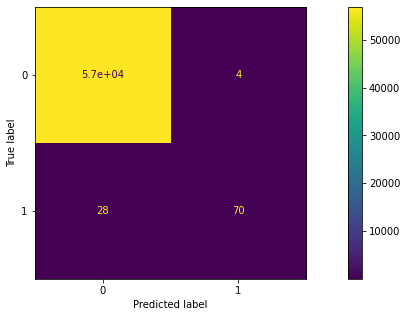

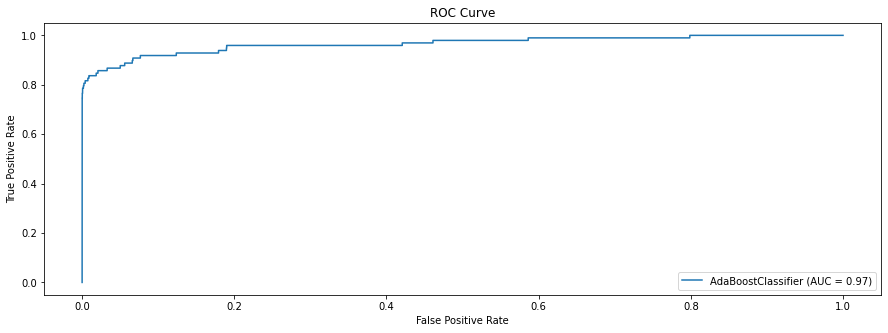

In [30]:

    
print('=================Test Result of the model===============')
pred=ESL_clf.predict(X_test)
accu=accuracy_score(y_val,pred)
con_matrix=confusion_matrix(y_val,pred)
clf_rep=classification_report(y_val,pred)
    
     
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
print("Confusion Matrix:")
sklearn.metrics.plot_confusion_matrix(ESL_clf,X_test,y_val)
print()
    

sklearn.metrics.plot_roc_curve(ESL_clf,X=X_test,y=y_val)
plt.title('ROC Curve')
plt.show()

We can observe that Ensembeled based AdaBoost algorithm along with Tree Based Decision Tree algorithm shows a Better results which has Good accuracy rate and a Better F1 Score for the Fraud Points (Class1).

##Project Task: Week 3

Applying ANN:

Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.
       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score
2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from
       above. 
3.    Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use
       techniques like Grid Search, Cross-Validation and Random search.

Anomaly Detection:

4.     Implement anomaly detection algorithms.
        a)    Assume that the data is coming from a single or a combination of multivariate Gaussian
        b)    Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in a)


In [31]:

from keras.models import Sequential,Model,load_model
from keras.layers import Dense,Dropout,BatchNormalization,Flatten
import tensorflow as tf

#importing the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
import sklearn
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [45]:
X_val.shape

(56962, 21)

Here, I will define our classifier builder object. I will use ANN with 3 hidden layers with 24,32,24 nodes each respectively . My activation
function will be relu(x, alpha=0.0, max_value=None), random weights of layers will be "uniformly" distirbuted,
output node will have sigmoid activation function, because classification is binary.For compiling of model I will use adam optimizer, binary cross entropy loss function.  

In [44]:
# build a Simple ANN Model

model = Sequential()
model.add(Dense(24, input_dim=21, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=24,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# simple early stopping : This tech is used to stop learning of the model if there isn't imporvment in model scores.
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto',patience=10,restore_best_weights=True, verbose=1)

# fit the data
history=model.fit(X,y,validation_data=(X_val,y_val),epochs=50,batch_size=100,callbacks=[es])


Epoch 1/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9946 - val_loss: 0.8631 - val_accuracy: 0.5541
Epoch 2/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0104 - accuracy: 0.9984 - val_loss: 0.7200 - val_accuracy: 0.5730
Epoch 3/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.1943 - val_accuracy: 0.9276
Epoch 4/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.2303 - val_accuracy: 0.9050
Epoch 5/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0600 - val_accuracy: 0.9974
Epoch 6/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0666 - val_accuracy: 0.9982
Epoch 7/50
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 6.2730 - val_accuracy:

In [48]:
# Model learning accuracy
_, train_acc = model.evaluate(X, y, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))



Train: 0.999, Validation: 0.999


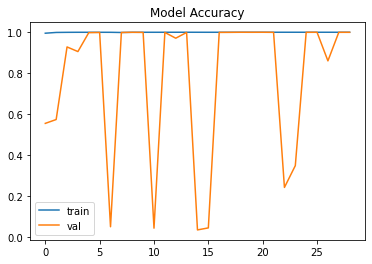

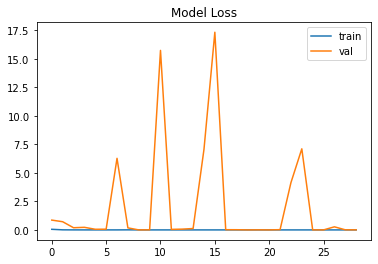

In [49]:
# Model learning accuracy

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Model Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.legend()
plt.show()

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.71      0.77        98

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962




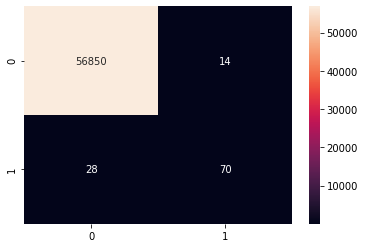

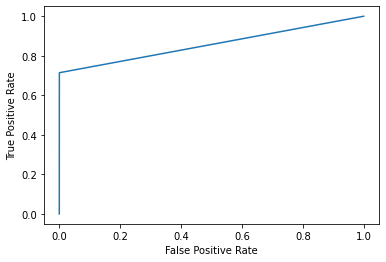

In [52]:
y_pred=(model.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred)
con_matrix=confusion_matrix(y_val,y_pred)
clf_rep=classification_report(y_val,y_pred,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The simple ANN model show a Better performance compared to many of the ML model.

The even though Model Accuracy is very high it has a good F1 Score of 0.77 for Fraud Class predtiction 

### Trying Drop Out function and its effects on the model.

In [57]:
model_1 = Sequential()
model_1.add(Dense(24, input_dim=21, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())

model_1.add(Dense(units=32,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())


model_1.add(Dense(units=24,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())


model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [58]:
# fit the data
history_drop=model_1.fit(X,y,validation_data=(X_val,y_val),epochs=50,batch_size=100)

Epoch 1/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0557 - acc: 0.9857 - val_loss: 0.0127 - val_acc: 0.9983
Epoch 2/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0133 - acc: 0.9983 - val_loss: 0.0127 - val_acc: 0.9983
Epoch 3/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0130 - acc: 0.9983 - val_loss: 0.0131 - val_acc: 0.9983
Epoch 4/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0130 - acc: 0.9983 - val_loss: 0.0131 - val_acc: 0.9982
Epoch 5/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0129 - acc: 0.9983 - val_loss: 0.0130 - val_acc: 0.9983
Epoch 6/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0129 - acc: 0.9983 - val_loss: 0.7004 - val_acc: 0.9983
Epoch 7/50
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0128 - acc: 0.9983 - val_loss: 0.0130 - val_acc: 0.9983
Epoch 8/50
2279/2279 [==============================] - 5s 2ms

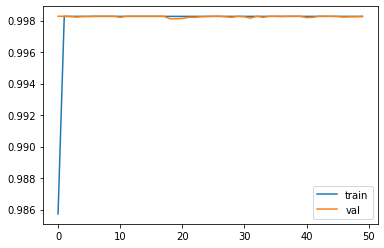

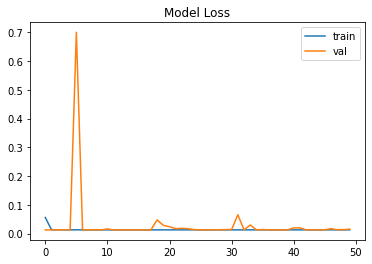

In [59]:
plt.plot(history_drop.history['acc'], label='train')
plt.plot(history_drop.history['val_acc'], label='val')
plt.legend()
plt.show()

plt.plot(history_drop.history['loss'], label='train')
plt.plot(history_drop.history['val_loss'], label='val')
plt.title('Model Loss')
plt.legend()
plt.show()

Model Accuracy:  99.8%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962




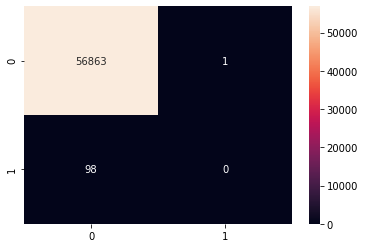

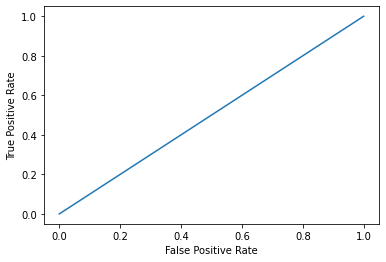

In [61]:
y_pred=(model_1.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred)
con_matrix=confusion_matrix(y_val,y_pred)
clf_rep=classification_report(y_val,y_pred,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The Useage of the dropout Layer doesn't Help much infact the model F1 Score fall drastically when compared to model without Dropout layer 

### Trying the model with deffirent Epochs and Batch Size there effects

In [62]:
history_epoch_1=model.fit(X,y,validation_data=(X_val,y_val),epochs=75,batch_size=100,callbacks=[es])

Epoch 1/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 12.5298 - val_accuracy: 0.1065
Epoch 2/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.1325 - val_accuracy: 0.9991
Epoch 3/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0501 - val_accuracy: 0.9992
Epoch 4/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 5/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 6/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0155 - val_accuracy: 0.9988
Epoch 7/75
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 11.0647 - val_accurac

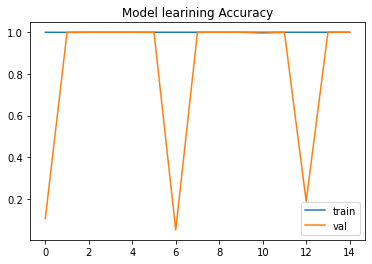

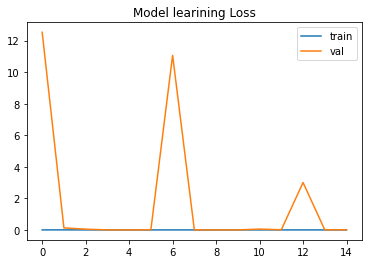

In [63]:
plt.plot(history_epoch_1.history['accuracy'], label='train')
plt.plot(history_epoch_1.history['val_accuracy'], label='val')
plt.title('Model learining Accuracy')
plt.legend()
plt.show()

plt.plot(history_epoch_1.history['loss'], label='train')
plt.plot(history_epoch_1.history['val_loss'], label='val')
plt.title('Model learining Loss')
plt.legend()
plt.show()

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.68      0.75        98

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962




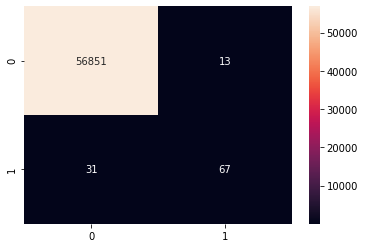

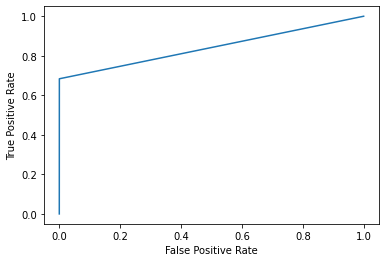

In [64]:
y_pred_1=(model.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred_1)
con_matrix=confusion_matrix(y_val,y_pred_1)
clf_rep=classification_report(y_val,y_pred_1,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [65]:
# Decrease in  no of epochs 
history_epoch_2=model.fit(X,y,validation_data=(X_val,y_val),epochs=30,batch_size=100)

2279/2279 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0735 - val_accuracy: 0.9920
Epoch 2/30
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0078 - val_accuracy: 0.9991
Epoch 3/30
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 4.2545 - val_accuracy: 0.2103
Epoch 4/30
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1814 - val_accuracy: 0.9507
Epoch 5/30
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0091 - val_accuracy: 0.9991
Epoch 6/30
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 7/30
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1565 - val_accuracy: 0.9985
Epo

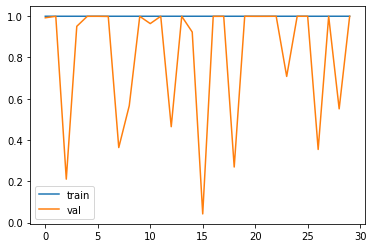

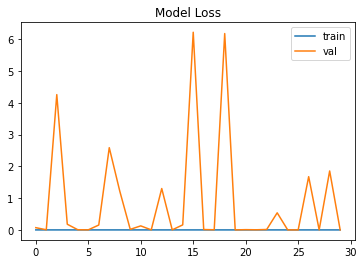

In [66]:
plt.plot(history_epoch_2.history['accuracy'], label='train')
plt.plot(history_epoch_2.history['val_accuracy'], label='val')
plt.legend()
plt.show()

plt.plot(history_epoch_2.history['loss'], label='train')
plt.plot(history_epoch_2.history['val_loss'], label='val')
plt.title('Model Loss')
plt.legend()
plt.show()

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.65      0.76        98

    accuracy                           1.00     56962
   macro avg       0.95      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962




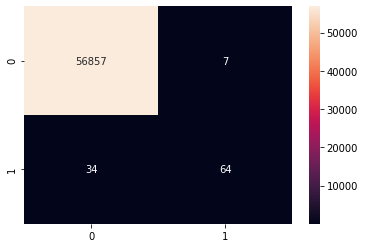

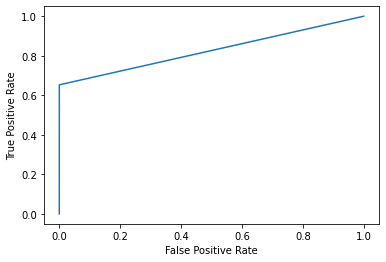

In [67]:
y_pred_1=(model.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred_1)
con_matrix=confusion_matrix(y_val,y_pred_1)
clf_rep=classification_report(y_val,y_pred_1,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### The Change in the Epochs Nos doesn't Change much in the model Performance even if we increases or Decrease the numbers

        Epochs No.           F1 Score
        50                   0.77
        75                   0.75
        30                   0.76

In [68]:
# Change in Batch size
history_batch_1=model.fit(X,y,validation_data=(X_val,y_val),epochs=50,batch_size=50,callbacks=[es])

Epoch 1/50
4557/4557 [==============================] - 7s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 2/50
4557/4557 [==============================] - 8s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 3/50
4557/4557 [==============================] - 7s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 8.6368 - val_accuracy: 0.1323
Epoch 4/50
4557/4557 [==============================] - 7s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 5/50
4557/4557 [==============================] - 8s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0083 - val_accuracy: 0.9991
Epoch 6/50
4557/4557 [==============================] - 8s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0119 - val_accuracy: 0.9989
Epoch 7/50
4557/4557 [==============================] - 8s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0265 - val_accuracy:

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.77      0.79        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962




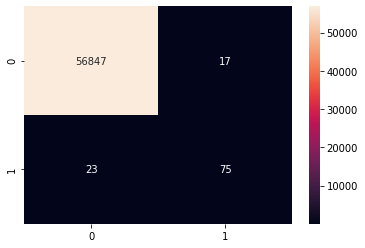

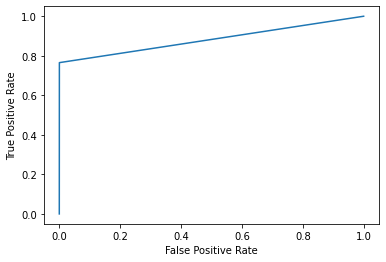

In [69]:
y_pred_1=(model.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred_1)
con_matrix=confusion_matrix(y_val,y_pred_1)
clf_rep=classification_report(y_val,y_pred_1,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [73]:
history_batch_1=model.fit(X,y,validation_data=(X_val,y_val),epochs=50,batch_size=30,callbacks=[es])

Epoch 1/50
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0122 - val_accuracy: 0.9990
Epoch 2/50
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/50
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0608 - val_accuracy: 0.9959
Epoch 4/50
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.6437 - val_accuracy: 0.5509
Epoch 5/50
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1572 - val_accuracy: 0.9472
Epoch 6/50
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 12.4939 - val_accuracy: 0.0890
Epoch 7/50
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0036 - val_a

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.72      0.77        98

    accuracy                           1.00     56962
   macro avg       0.91      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962




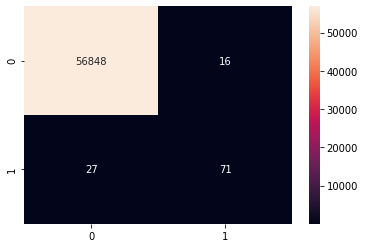

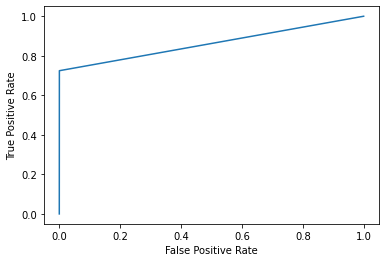

In [74]:
y_pred_1=(model.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred_1)
con_matrix=confusion_matrix(y_val,y_pred_1)
clf_rep=classification_report(y_val,y_pred_1,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [131]:
history_batch_2=model.fit(X,y,validation_data=(X_val,y_val),epochs=25,batch_size=150,callbacks=[es])

Epoch 1/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 2.7235 - val_accuracy: 0.3174
Epoch 2/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0141 - val_accuracy: 0.9987
Epoch 3/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 9.8470 - val_accuracy: 0.2603
Epoch 4/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 4.1893 - val_accuracy: 0.5381
Epoch 5/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0460 - val_accuracy: 0.9985
Epoch 6/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 7.0624 - val_accuracy: 0.2152
Epoch 7/25
1519/1519 [==============================] - 3s 2ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 17.2997 - val_accuracy

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.74      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962




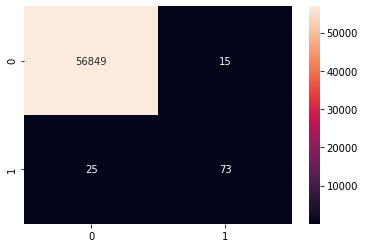

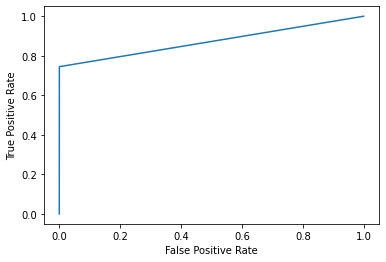

In [132]:
y_pred_1=(model.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred_1)
con_matrix=confusion_matrix(y_val,y_pred_1)
clf_rep=classification_report(y_val,y_pred_1,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### The Change in the Batch Size Nos doesn't Change much in the model Performance even if we increases or Decrease the numbers

        Batch Size           F1 Score
        30                    0.77
        50                    0.79
        100                   0.77
        150                   0.77

### Using GridSearch_CV to find the best parameters for the model

In [75]:
def classifier(optimizer='adam',activation='sigmoid',learn_rate=0.01):
  model_CV = Sequential()
  model_CV.add(Dense(24, input_dim=21, activation='relu', kernel_initializer='he_uniform'))
  model_CV.add(BatchNormalization())

  model_CV.add(Dense(units=32,activation='relu'))
  model_CV.add(BatchNormalization())

  model_CV.add(Dense(units=24,activation='relu'))
  model_CV.add(BatchNormalization())

  model_CV.add(Dense(1, activation=activation))
  model_CV.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model_CV



In [76]:
keras_classifier=KerasClassifier(build_fn=classifier)

In [77]:
# define the grid search parameters
optimizer = ['SGD', 'Adagrad', 'Adam','Adamax']
learn_rate = [0.01,0.05, 0.1, 0.2]
activation = ['softmax', 'relu', 'sigmoid']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [78]:
param_grid = dict(optimizer=optimizer,
                  learn_rate=learn_rate,
                  activation=activation)

In [124]:
grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X,y)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


7121/7121 [==============================] - 9s 1ms/step - loss: 0.0308 - accuracy: 0.9972
Best: 0.998297 using {'activation': 'sigmoid', 'learn_rate': 0.1, 'optimizer': 'Adamax'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.01, 'optimizer': 'Adagrad'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.01, 'optimizer': 'Adamax'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.05, 'optimizer': 'SGD'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.05, 'optimizer': 'Adagrad'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.05, 'optimizer': 'Adam'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.05, 'optimizer': 'Adamax'}
0.001729 (0.000175) with: {'activation': 'softmax', 'learn_rate': 0.

In [125]:
 grid_result.best_params_

{'activation': 'sigmoid', 'learn_rate': 0.1, 'optimizer': 'Adamax'}

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.74      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962




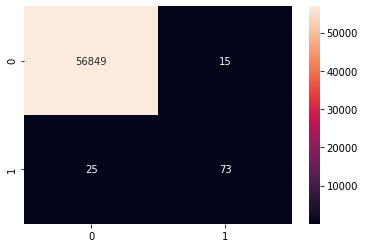

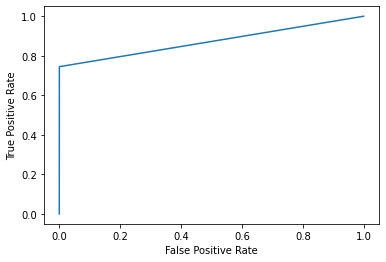

In [133]:
y_pred_1=(grid.predict(X_test)>0.5).astype('int32')
accu=accuracy_score(y_val,y_pred_1)
con_matrix=confusion_matrix(y_val,y_pred_1)
clf_rep=classification_report(y_val,y_pred_1,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print() 
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##Anomaly Detection using the Inter Quartile Range method.

In [79]:
# We shall use the Validation data sets for the steps
val_df=pd.read_csv('/content/drive/My Drive/Capstone_Project/test_data_hidden.csv')

val_df['Amount_Stand'] = scaler.fit_transform(val_df['Amount'].values.reshape(-1,1))
val_df=val_df.drop('Amount',axis=1)

In [80]:
test_df=pd.read_csv('/content/drive/My Drive/Capstone_Project/test_data.csv')

test_df['Amount_Stand'] = scaler.fit_transform(test_df['Amount'].values.reshape(-1,1))
test_df=test_df.drop('Amount',axis=1)

In [81]:
Q1 = val_df.quantile(0.25)
Q3 = val_df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Time            84948.750000
V1                  2.228317
V2                  1.401371
V3                  1.910858
V4                  1.586305
V5                  1.309512
V6                  1.162945
V7                  1.120866
V8                  0.536095
V9                  1.241706
V10                 0.988180
V11                 1.496742
V12                 1.022559
V13                 1.316119
V14                 0.911374
V15                 1.224599
V16                 0.992674
V17                 0.887576
V18                 0.996978
V19                 0.914603
V20                 0.342839
V21                 0.415019
V22                 1.073514
V23                 0.310164
V24                 0.794256
V25                 0.664632
V26                 0.568052
V27                 0.160941
V28                 0.129834
Class               0.000000
Amount_Stand        1.000000
dtype: float64


In [83]:
col_name = 'Amount_Stand'
low  = Q1[col_name] - 1.5 * IQR[col_name]
high = Q3[col_name] + 1.5 * IQR[col_name]

low, high

(-1.7265423941016902, 2.27345760589831)

In [84]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
query_string = '{} < @low or {} > @high'.format(col_name, col_name)

outlier_arr1 = val_df.query(query_string).index
outlier_arr1

Int64Index([    5,    17,    37,    40,    67,    72,    98,    99,   101,
              117,
            ...
            56812, 56825, 56847, 56852, 56859, 56877, 56902, 56918, 56937,
            56945],
           dtype='int64', length=6320)

In [85]:
# Find the Anomaly outliers
init = False

for col_name in list(val_df.columns):

    low  = Q1[col_name] - 1.5 * IQR[col_name]
    high = Q3[col_name] + 1.5 * IQR[col_name]

    query_string = '{} < @low or {} > @high'.format(col_name, col_name)

    outlier_arr_loop = val_df.query(query_string).index
    
    if not init:
        outlier_arr = outlier_arr_loop
        init = True
    
    outlier_arr = outlier_arr.union(outlier_arr_loop)

In [86]:
# Lets Extract the Anomaly Data Sets from the Validation Data
anomaly_df=val_df.iloc[outlier_arr]
anomaly_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Stand
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,-0.587786,0.317419,-0.408521,0.719639,0.226926,-0.296316,-0.040143,0.119177,1.057682,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,0,0.877791
5,55069.0,0.441380,-2.217230,0.802581,-0.127056,-1.867945,0.495430,-0.741205,0.214230,-0.198782,0.311865,1.308096,0.644987,0.029716,-0.594013,-1.096101,0.635967,0.802594,-1.483659,0.636492,0.866981,0.346116,0.232975,-0.316073,0.288840,0.103051,-0.289289,-0.010973,0.085977,0,5.589483
6,135629.0,1.937007,0.394490,-0.860965,3.720728,0.458475,0.159445,0.017991,0.024848,-0.615042,1.511407,-1.706707,-1.172083,-1.492230,0.453003,-0.626810,0.841378,-0.729508,0.060131,-1.575751,-0.350720,0.258103,0.737337,0.030587,0.633156,0.198230,0.219840,-0.049470,-0.048914,0,-0.157335
7,33643.0,-0.552654,-0.279974,2.626373,0.535665,-1.350645,0.523387,0.124452,0.076345,-0.800457,0.498082,-0.691389,-1.059067,-1.193405,-0.315771,1.034917,-1.974663,0.483119,1.457900,-0.888320,-0.151429,-0.094506,0.261415,0.152325,0.322421,-0.217550,-0.179712,-0.010302,-0.087118,0,1.601169
8,80729.0,-2.760629,2.206112,-0.193100,0.764237,-0.718603,-0.920526,0.228957,0.507112,0.084184,1.200311,-0.516928,0.668461,1.020972,0.317697,0.999213,-0.194919,0.005242,-0.035751,0.318936,0.131668,0.037991,0.463003,0.083789,0.412720,0.093874,-0.336316,0.084779,0.490768,0,0.253321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56948,92437.0,2.076251,-1.002324,0.075623,-0.036659,-1.061289,0.504667,-1.393393,0.055859,1.904680,0.196185,-0.738811,-1.767448,2.918756,0.355505,-1.788744,-1.527652,0.747248,1.106198,-0.573071,-0.540153,-0.731756,-1.039403,0.412610,0.427449,-0.560991,0.358636,-0.004968,-0.035803,0,-0.034221
56949,63981.0,-0.870892,0.432589,0.970395,1.529227,2.793893,4.226519,-0.357106,1.168700,-1.179056,0.287702,-0.693478,-0.360441,-0.115741,-0.030648,0.055131,0.202678,-0.351480,0.073506,0.984139,0.356219,-0.302355,-1.125433,-0.010888,0.960935,0.225260,-0.079752,0.061105,0.092613,0,0.113097
56953,157273.0,1.716127,0.008542,0.207395,3.814778,-0.434853,0.419651,-0.565365,0.254429,-0.485550,1.578050,0.284249,-0.014221,-0.892248,0.203525,-0.989392,1.463408,-1.143365,0.726195,-1.593363,-0.216390,0.340360,0.874413,0.101280,0.041961,-0.265824,0.073856,-0.008570,-0.034386,0,0.545594
56954,35641.0,-0.906365,0.103318,1.244399,0.676516,1.485228,0.205018,0.084021,0.107232,-0.887351,-0.195039,-1.114959,0.015297,1.407310,0.092644,2.024472,-0.479003,0.039431,-0.241541,1.944650,0.570331,-0.111590,-0.508704,-0.105506,-1.266975,0.185235,0.675580,0.024479,0.080677,0,0.154413


In [87]:
ano_count=anomaly_df['Class'].value_counts()
ano_count

0    27490
1       98
Name: Class, dtype: int64

In [89]:
true_count=val_df.Class.value_counts()
true_count

0    56864
1       98
Name: Class, dtype: int64

From the above methodlogy we can observe that we have sucessfully extracted all the fraudulant data points. 
We have 98 fraud data points in our Orginal test data set. After using the IQR method we where able to extract all the 98 fraud values

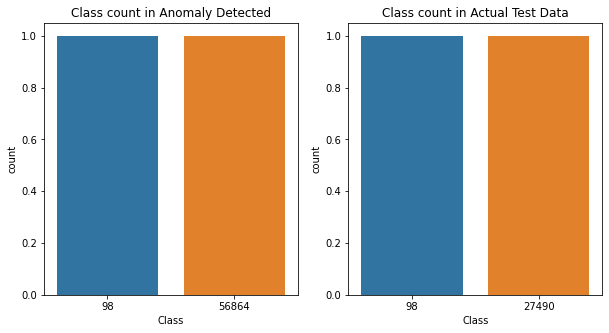

In [90]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=true_count,ax=ax1)
ax1.set_title('Class count in Anomaly Detected')
sns.countplot(x=ano_count,ax=ax2)
ax2.set_title('Class count in Actual Test Data')
plt.show()


## Project Task: Week 4

Inference and Observations:

Visualize the scores for Fraudulent and Non-Fraudulent transactions.
Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score.

###Determining the Threshold value and its affects on the model prediction

Using Z Score method 

In [91]:
val_df=pd.read_csv('/content/drive/My Drive/Capstone_Project/test_data_hidden.csv')
val_df['Amount_Stand'] = scaler.fit_transform(val_df['Amount'].values.reshape(-1,1))
val_df=val_df.drop('Amount',axis=1)

In [92]:
from scipy import stats


z=np.abs(stats.zscore(val_df))

Setting the threshold at 3 and 4 for anomaly values. And checking there affects on the ML and ANN model

In [93]:
threshold = 3

result = np.where(z > threshold)
result

(array([    1,    20,    23, ..., 56961, 56961, 56961]),
 array([ 6, 13, 12, ..., 21, 22, 23]))

In [94]:
threshold = 4

result_1 = np.where(z > threshold)
result_1

(array([   29,    29,    40, ..., 56961, 56961, 56961]),
 array([ 7, 23,  5, ..., 21, 22, 23]))

In [95]:
print('Outliers at Threshold 3',(len(result[0]),len(result[1])))
print('Outliers at Threshold 4',(len(result_1[0]),len(result_1[1])))

Outliers at Threshold 3 (16633, 16633)
Outliers at Threshold 4 (7315, 7315)


In [96]:
outlier_3 = pd.DataFrame(data=result[0], columns=['ROWNUM'])
outlier_3['COLNUM'] = result[1]
outlier_3

,ROWNUM,COLNUM
0,1,6
1,20,13
2,23,12
3,29,7
4,29,8
...,...,...
16628,56961,8
16629,56961,17
16630,56961,21
16631,56961,22


In [97]:
outlier_4 = pd.DataFrame(data=result_1[0], columns=['ROWNUM'])
outlier_4['COLNUM'] = result_1[1]
outlier_4

,ROWNUM,COLNUM
0,29,7
1,29,23
2,40,5
3,40,6
4,40,8
...,...,...
7310,56961,7
7311,56961,8
7312,56961,21
7313,56961,22


In [98]:
outlier_3.COLNUM.value_counts()

20    955
2     899
27    897
6     848
8     848
21    824
1     786
30    755
10    705
19    702
28    688
14    682
12    656
23    639
4     637
7     606
25    571
5     502
17    487
9     464
3     408
16    407
18    342
22    263
15    250
13    246
26    203
11    136
24    129
29     98
Name: COLNUM, dtype: int64

In [99]:
outlier_4.COLNUM.value_counts()

8     579
27    536
20    524
21    503
30    482
10    455
2     444
23    403
1     376
28    373
7     335
5     247
14    240
9     208
17    199
3     189
6     162
25    161
19    122
26    111
12    110
22    106
16     99
29     98
4      84
18     68
11     57
24     30
15     11
13      3
Name: COLNUM, dtype: int64

In [100]:
columns =val_df.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Stand'],
      dtype='object')

In [101]:
outlier_3['COLNAME'] = columns[outlier_3.COLNUM]
outlier_3.head(10)

,ROWNUM,COLNUM,COLNAME
0,1,6,V6
1,20,13,V13
2,23,12,V12
3,29,7,V7
4,29,8,V8
5,29,21,V21
6,29,23,V23
7,29,25,V25
8,30,19,V19
9,30,25,V25


In [102]:
outlier_4['COLNAME'] = columns[outlier_4.COLNUM]
outlier_4.head(10)

,ROWNUM,COLNUM,COLNAME
0,29,7,V7
1,29,23,V23
2,40,5,V5
3,40,6,V6
4,40,8,V8
5,40,10,V10
6,40,21,V21
7,40,22,V22
8,40,27,V27
9,40,28,V28


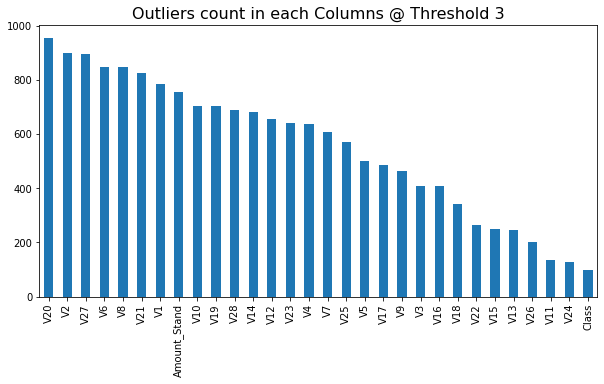

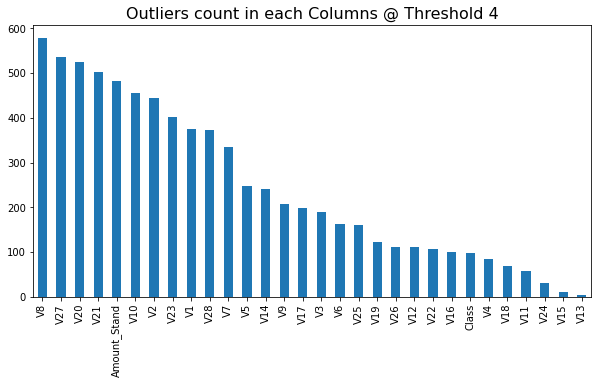

In [103]:
plt.figure(figsize=(10,5))
outlier_3.COLNAME.value_counts(sort=True).plot(kind='bar')
plt.title("Outliers count in each Columns @ Threshold 3",fontsize=16)
plt.show()

plt.figure(figsize=(10,5))
outlier_4.COLNAME.value_counts(sort=True).plot(kind='bar')
plt.title("Outliers count in each Columns @ Threshold 4",fontsize=16)
plt.show()

In [104]:
new_3df=val_df.drop(['V20','V2','V27','V6','V8','V1','V21','V10','V19'],axis=1)

test_3df=test_df.drop(['V20','V2','V27','V6','V8','V1','V21','V10','V19'],axis=1)
new_3df.shape

(56962, 22)

In [105]:
new_3df.describe()

,Time,V3,V4,V5,V7,V9,V11,V12,V13,V14,V15,V16,V17,V18,V22,V23,V24,V25,V26,V28,Class,Amount_Stand
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,95057.882360,-0.004263,0.001496,-0.003508,0.000141,0.001564,-0.008330,-0.000041,-0.000320,-0.003711,0.002949,-0.001734,0.000030,0.003325,-0.004938,0.004008,-0.001017,-0.000872,0.004513,-0.001990,0.001720,0.914778
std,47438.688395,1.516853,1.419107,1.431731,1.301800,1.103688,1.015901,0.997691,0.994583,0.954667,0.912533,0.878088,0.841764,0.836135,0.730301,0.621623,0.604191,0.521003,0.481857,0.325640,0.041443,3.589662
min,2.000000,-48.325589,-5.560118,-113.743307,-28.215112,-9.481456,-4.009307,-18.553697,-3.848943,-19.214325,-4.092344,-12.661696,-21.710188,-8.859452,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-15.430084,0.000000,-0.304653
25%,54286.250000,-0.893961,-0.847617,-0.694059,-0.551096,-0.642072,-0.768230,-0.405703,-0.648105,-0.423884,-0.575757,-0.471831,-0.484962,-0.494863,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.052351,0.000000,-0.226542
50%,85226.500000,0.170910,-0.022094,-0.051828,0.039155,-0.052607,-0.043537,0.140321,-0.013682,0.046713,0.051535,0.066099,-0.066498,-0.005457,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.011354,0.000000,0.000000
75%,139235.000000,1.016897,0.738688,0.615454,0.569769,0.599634,0.728512,0.616856,0.668013,0.487491,0.648842,0.520843,0.402614,0.502115,0.524484,0.149985,0.437657,0.348895,0.245286,0.077483,0.000000,0.773458
max,172785.000000,3.985446,15.304184,29.016124,120.589494,10.370658,12.018913,4.846452,7.126883,7.421944,8.877742,17.315112,7.733456,4.093440,6.790452,20.803344,4.584549,7.519589,3.517346,22.620072,1.000000,357.087849


The threshold of **4** is set and outliers are Anomoly are detected.

We shall drop columns which has outliers of count around and more of 350 data points from our training data sets. And then use them in our ML models and compare the changes.
We observe outliers in Amount too but it is a important feature so we shall scale it has done before.

In [106]:
new_4df=val_df.drop(['V27','V8','V20','V21','V10','V2','V23','V7','V1'],axis=1)
test_4df=test_df.drop(['V27','V8','V20','V21','V10','V2','V23','V7','V1'],axis=1)

new_4df.shape

(56962, 22)

In [107]:
new_4df.describe()

,Time,V3,V4,V5,V6,V9,V11,V12,V13,V14,V15,V16,V17,V18,V19,V22,V24,V25,V26,V28,Class,Amount_Stand
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,95057.882360,-0.004263,0.001496,-0.003508,-0.003079,0.001564,-0.008330,-0.000041,-0.000320,-0.003711,0.002949,-0.001734,0.000030,0.003325,0.000766,-0.004938,-0.001017,-0.000872,0.004513,-0.001990,0.001720,0.914778
std,47438.688395,1.516853,1.419107,1.431731,1.359647,1.103688,1.015901,0.997691,0.994583,0.954667,0.912533,0.878088,0.841764,0.836135,0.819729,0.730301,0.604191,0.521003,0.481857,0.325640,0.041443,3.589662
min,2.000000,-48.325589,-5.560118,-113.743307,-20.054615,-9.481456,-4.009307,-18.553697,-3.848943,-19.214325,-4.092344,-12.661696,-21.710188,-8.859452,-4.619034,-8.593642,-2.822684,-8.696627,-1.778061,-15.430084,0.000000,-0.304653
25%,54286.250000,-0.893961,-0.847617,-0.694059,-0.770145,-0.642072,-0.768230,-0.405703,-0.648105,-0.423884,-0.575757,-0.471831,-0.484962,-0.494863,-0.455728,-0.549030,-0.356599,-0.315738,-0.322766,-0.052351,0.000000,-0.226542
50%,85226.500000,0.170910,-0.022094,-0.051828,-0.278939,-0.052607,-0.043537,0.140321,-0.013682,0.046713,0.051535,0.066099,-0.066498,-0.005457,0.003560,-0.000329,0.040045,0.018074,-0.047859,0.011354,0.000000,0.000000
75%,139235.000000,1.016897,0.738688,0.615454,0.392801,0.599634,0.728512,0.616856,0.668013,0.487491,0.648842,0.520843,0.402614,0.502115,0.458875,0.524484,0.437657,0.348895,0.245286,0.077483,0.000000,0.773458
max,172785.000000,3.985446,15.304184,29.016124,73.301626,10.370658,12.018913,4.846452,7.126883,7.421944,8.877742,17.315112,7.733456,4.093440,5.591971,6.790452,4.584549,7.519589,3.517346,22.620072,1.000000,357.087849


In [108]:
X3=new_3df.drop(['Class'],axis=1)
y3=new_3df['Class']

X4=new_4df.drop(['Class'],axis=1)
y4=new_4df['Class']

In [109]:
X_3train,X_3val,y_3train,y_3val=train_test_split(X3,y3,test_size=0.35,random_state=1)

X_4train,X_4val,y_4train,y_4val=train_test_split(X4,y4,test_size=0.35,random_state=1)

In [110]:
X_3train.shape,X_3val.shape

((37025, 21), (19937, 21))

In [111]:
X_4train.shape,X_4val.shape

((37025, 21), (19937, 21))

In [112]:
# Train Logistic Regression model
Log_clf.fit(X_3train,y_3train)

# Train Navie Bayes
NB_clf.fit(X_3train,y_3train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [113]:
moodel_list=[('Logistic Regression Classifier ',Log_clf),
             ('Navie Base BernoulliNB',NB_clf)]
models=[m for m in moodel_list]

================ *Model Evaluation @ Threshold 3 Results* ================= 

===== Logistic Regression Classifier  =====
Model Accuracy:  0.9984451020715253%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19905
           1       0.53      0.31      0.39        32

    accuracy                           1.00     19937
   macro avg       0.76      0.66      0.70     19937
weighted avg       1.00      1.00      1.00     19937


Confusion Matrix:



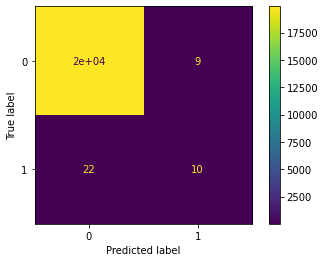

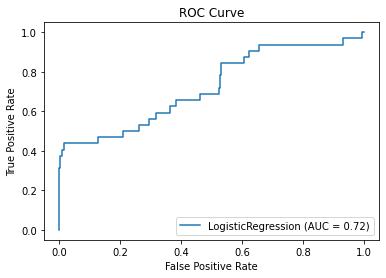

===== Navie Base BernoulliNB =====
Model Accuracy:  0.9984952600692181%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19905
           1       1.00      0.06      0.12        32

    accuracy                           1.00     19937
   macro avg       1.00      0.53      0.56     19937
weighted avg       1.00      1.00      1.00     19937


Confusion Matrix:



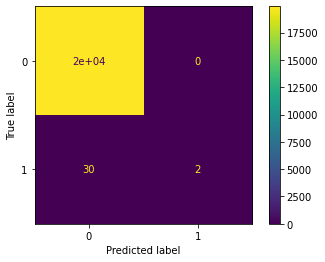

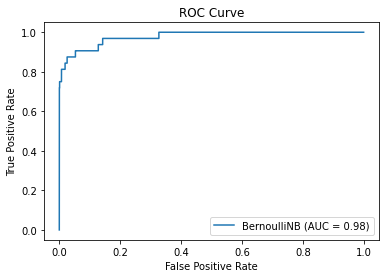

In [114]:
print('================ *Model Evaluation @ Threshold 3 Results* =================','\n')

for i,v in models:
    pred=v.predict(X_3val)
    accu=accuracy_score(y_3val,pred)
    con_matrix=confusion_matrix(y_3val,pred)
    clf_rep=classification_report(y_3val,pred,zero_division=0)
    
    print('===== {} ====='.format(i))
     
    print ("Model Accuracy: ", '{}%'.format(accu)) 
    print()
    print("Classification Report:" "\n", clf_rep) 
    print()
    print("Confusion Matrix:")
    sklearn.metrics.plot_confusion_matrix(v,X_3val,y_3val)
    print()
    
    sklearn.metrics.plot_roc_curve(v,X_3val,y_3val)
    plt.title('ROC Curve')
    plt.show()

In [115]:
# Train Logistic Regression model
Log_clf.fit(X_4train,y_4train)


# Train Navie Bayes
NB_clf.fit(X_4train,y_4train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

================ *Model Evaluation  @ Threshold 4 Results* ================= 

===== Logistic Regression Classifier  =====
Model Accuracy:  0.9984952600692181

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19905
           1       0.56      0.31      0.40        32

    accuracy                           1.00     19937
   macro avg       0.78      0.66      0.70     19937
weighted avg       1.00      1.00      1.00     19937


Confusion Matrix:



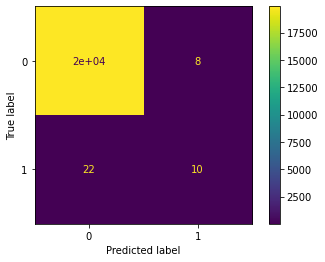

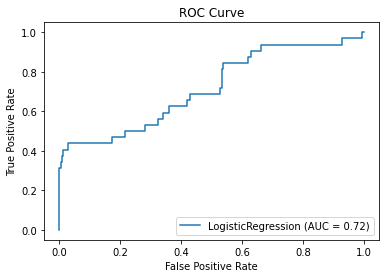

===== Navie Base BernoulliNB =====
Model Accuracy:  0.9985955760646035

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19905
           1       1.00      0.12      0.22        32

    accuracy                           1.00     19937
   macro avg       1.00      0.56      0.61     19937
weighted avg       1.00      1.00      1.00     19937


Confusion Matrix:



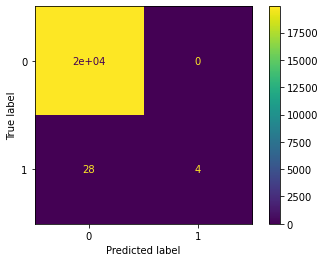

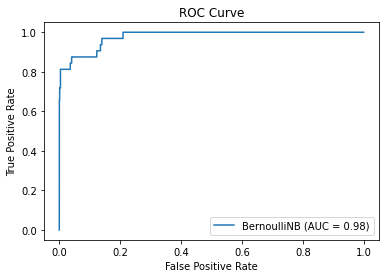

In [116]:
print('================ *Model Evaluation  @ Threshold 4 Results* =================','\n')

for i,v in models:
    pred=v.predict(X_4val)
    accu=accuracy_score(y_4val,pred)
    con_matrix=confusion_matrix(y_4val,pred)
    clf_rep=classification_report(y_4val,pred,zero_division=0)
    
    print('===== {} ====='.format(i))
    print ("Model Accuracy: ", accu) 
    print()
    print("Classification Report:" "\n", clf_rep) 
    print()
    print("Confusion Matrix:")
    sklearn.metrics.plot_confusion_matrix(v,X_4val,y_4val)
    print()
    
    sklearn.metrics.plot_roc_curve(v,X_4val,y_4val)
    plt.title('ROC Curve')
    plt.show()

In [117]:
model = Sequential()
model.add(Dense(24, input_dim=21, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=24,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
# fit the data
history3=model.fit(X_3train,y_3train,validation_data=(X_3val,y_3val),epochs=50,batch_size=50)

Epoch 1/50
741/741 [==============================] - 2s 2ms/step - loss: 0.1475 - accuracy: 0.9858 - val_loss: 0.0123 - val_accuracy: 0.9983
Epoch 2/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9981 - val_loss: 0.0642 - val_accuracy: 0.9859
Epoch 3/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9982 - val_loss: 0.0274 - val_accuracy: 0.9983
Epoch 4/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.5589 - val_accuracy: 0.6990
Epoch 5/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9982 - val_loss: 0.0217 - val_accuracy: 0.9983
Epoch 6/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 0.9982 - val_loss: 0.0198 - val_accuracy: 0.9983
Epoch 7/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.0721 - val_accuracy: 0.9983
Epoch 

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19905
           1       0.80      0.25      0.38        32

    accuracy                           1.00     19937
   macro avg       0.90      0.62      0.69     19937
weighted avg       1.00      1.00      1.00     19937




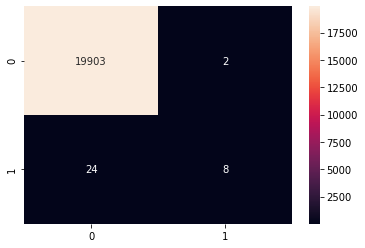

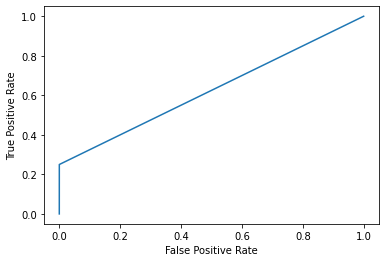

In [119]:
y_pred=(model.predict(X_3val)>0.5).astype('int32')
accu=accuracy_score(y_3val,y_pred)
con_matrix=confusion_matrix(y_3val,y_pred)
clf_rep=classification_report(y_3val,y_pred,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_3val, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [121]:
history4=model.fit(X_4train,y_4train,validation_data=(X_4val,y_4val),epochs=50,batch_size=50)

Epoch 1/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0081 - val_accuracy: 0.9987
Epoch 2/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0124 - val_accuracy: 0.9987
Epoch 3/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 1.3250 - val_accuracy: 0.5972
Epoch 4/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.3067 - val_accuracy: 0.8621
Epoch 5/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 20.0669 - val_accuracy: 0.0024
Epoch 6/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 6.7662 - val_accuracy: 0.0722
Epoch 7/50
741/741 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0110 - val_accuracy: 0.9988
Epoch

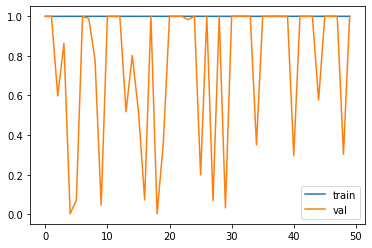

In [122]:
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='val')
plt.legend()
plt.show()

Model Accuracy:  99.9%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19905
           1       0.80      0.25      0.38        32

    accuracy                           1.00     19937
   macro avg       0.90      0.62      0.69     19937
weighted avg       1.00      1.00      1.00     19937




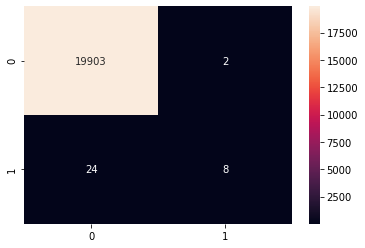

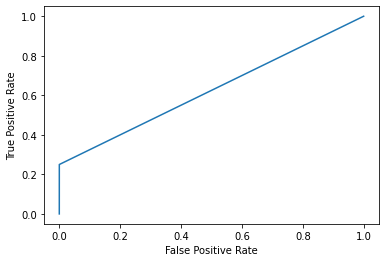

In [123]:
y_pred=(model.predict(X_4val)>0.5).astype('int32')
accu=accuracy_score(y_4val,y_pred)
con_matrix=confusion_matrix(y_4val,y_pred)
clf_rep=classification_report(y_4val,y_pred,zero_division=0)
    
print ("Model Accuracy: ", '{}%'.format(np.round(accu, 3) * 100)) 
print()
print("Classification Report:" "\n", clf_rep) 
print()
sns.heatmap(con_matrix,annot=True, fmt="d")
plt.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_4val, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

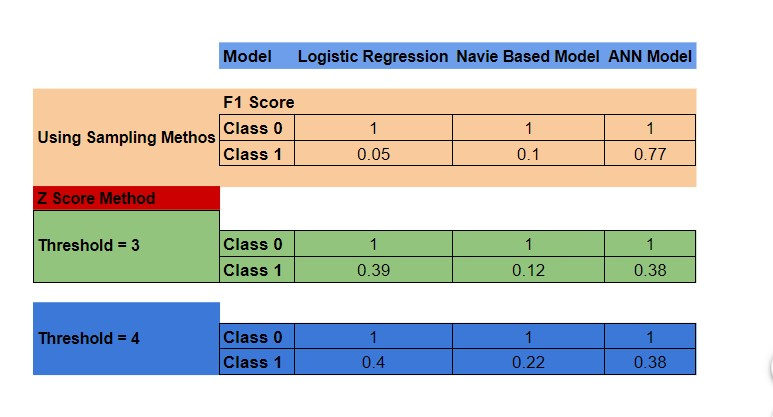

Above is the Comprassion of the models F1 Score of Best Score in Sampling Method and the Models When we process the Data Using Z Score method at Threshold **3 & 4**



1.   We can say that the Machine Learning Models Perform Well we apply the Z sore Method but the ANN models underperform than Before.
2.   When Comparision with Models at Thershold 3 and 4 


*   We Logistic Regression Model Doesn't Show much change but certainly better than the Sampling Data trained model.
*   The Navie Based Classifier show large imporment in the model F1 score compored in previous method used

### Hence I Would Suggest the Threshold Value to REmove the Outliers should Be **4**




## Conclusion 
 After Various Methodolgy of Data Processing , Models Trainning and  Tuning for the Fraud Detection in the highly Imblanced Data.


*  The Data which we had obtained had large numbers of Outliers , Some of the Features were poorly distributre have even very low Variance. 

*   The EDA showed how the Fraud takes place through low amount but at a Large scale . We can say that the Since the Amount is low the Coustomer may Not Notice the fraud happened in there Account or  may simple choose of ignore to rise the issues to the bank itself.

* After Training and Predcting the varoius ML model , We can observe that the Tree Based model which have the Class Ibmalnce Countering Fearuters Out Perform the Other type of ML Models.

*  The Simple ANN models without much of Data processing of the Class  outperform a some of the  HyperTuned Machine Learing Model.

*  The ANN models do work better then ML models but not much of increase in the Model Performance after various tuning methods.

* The Anomaly Detection using the Outliers Extraction Method works wells.

* The Threshold Of 4 can be used to in anamoly predicition. 


